# EDA

Dataset Description
-------------------

File descriptions
-----------------

*   **train.csv** - the training set
*   **test.csv** - the test set
*   **data\_description.txt** - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
*   **sample\_submission.csv** - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

Data fields
-----------

Here's a brief version of what you'll find in the data description file.

*   **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
*   **MSSubClass**: The building class
*   **MSZoning**: The general zoning classification
*   **LotFrontage**: Linear feet of street connected to property
*   **LotArea**: Lot size in square feet
*   **Street**: Type of road access
*   **Alley**: Type of alley access
*   **LotShape**: General shape of property
*   **LandContour**: Flatness of the property
*   **Utilities**: Type of utilities available
*   **LotConfig**: Lot configuration
*   **LandSlope**: Slope of property
*   **Neighborhood**: Physical locations within Ames city limits
*   **Condition1**: Proximity to main road or railroad
*   **Condition2**: Proximity to main road or railroad (if a second is present)
*   **BldgType**: Type of dwelling
*   **HouseStyle**: Style of dwelling
*   **OverallQual**: Overall material and finish quality
*   **OverallCond**: Overall condition rating
*   **YearBuilt**: Original construction date
*   **YearRemodAdd**: Remodel date
*   **RoofStyle**: Type of roof
*   **RoofMatl**: Roof material
*   **Exterior1st**: Exterior covering on house
*   **Exterior2nd**: Exterior covering on house (if more than one material)
*   **MasVnrType**: Masonry veneer type
*   **MasVnrArea**: Masonry veneer area in square feet
*   **ExterQual**: Exterior material quality
*   **ExterCond**: Present condition of the material on the exterior
*   **Foundation**: Type of foundation
*   **BsmtQual**: Height of the basement
*   **BsmtCond**: General condition of the basement
*   **BsmtExposure**: Walkout or garden level basement walls
*   **BsmtFinType1**: Quality of basement finished area
*   **BsmtFinSF1**: Type 1 finished square feet
*   **BsmtFinType2**: Quality of second finished area (if present)
*   **BsmtFinSF2**: Type 2 finished square feet
*   **BsmtUnfSF**: Unfinished square feet of basement area
*   **TotalBsmtSF**: Total square feet of basement area
*   **Heating**: Type of heating
*   **HeatingQC**: Heating quality and condition
*   **CentralAir**: Central air conditioning
*   **Electrical**: Electrical system
*   **1stFlrSF**: First Floor square feet
*   **2ndFlrSF**: Second floor square feet
*   **LowQualFinSF**: Low quality finished square feet (all floors)
*   **GrLivArea**: Above grade (ground) living area square feet
*   **BsmtFullBath**: Basement full bathrooms
*   **BsmtHalfBath**: Basement half bathrooms
*   **FullBath**: Full bathrooms above grade
*   **HalfBath**: Half baths above grade
*   **Bedroom**: Number of bedrooms above basement level
*   **Kitchen**: Number of kitchens
*   **KitchenQual**: Kitchen quality
*   **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
*   **Functional**: Home functionality rating
*   **Fireplaces**: Number of fireplaces
*   **FireplaceQu**: Fireplace quality
*   **GarageType**: Garage location
*   **GarageYrBlt**: Year garage was built
*   **GarageFinish**: Interior finish of the garage
*   **GarageCars**: Size of garage in car capacity
*   **GarageArea**: Size of garage in square feet
*   **GarageQual**: Garage quality
*   **GarageCond**: Garage condition
*   **PavedDrive**: Paved driveway
*   **WoodDeckSF**: Wood deck area in square feet
*   **OpenPorchSF**: Open porch area in square feet
*   **EnclosedPorch**: Enclosed porch area in square feet
*   **3SsnPorch**: Three season porch area in square feet
*   **ScreenPorch**: Screen porch area in square feet
*   **PoolArea**: Pool area in square feet
*   **PoolQC**: Pool quality
*   **Fence**: Fence quality
*   **MiscFeature**: Miscellaneous feature not covered in other categories
*   **MiscVal**: $Value of miscellaneous feature
*   **MoSold**: Month Sold
*   **YrSold**: Year Sold
*   **SaleType**: Type of sale
*   **SaleCondition**: Condition of sale

Link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
le = preprocessing.LabelEncoder()

<IPython.core.display.Javascript object>

In [4]:
sample_submission_df = pd.read_csv(
    "../../data/house-prices-advanced-regression-techniques/sample_submission.csv"
).set_index("Id")
sample_submission_df

,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977
...,...
2915,167081.220949
2916,164788.778231
2917,219222.423400


<IPython.core.display.Javascript object>

In [5]:
train_df = pd.read_csv(
    "../../data/house-prices-advanced-regression-techniques/train.csv"
).set_index("Id")
train_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


<IPython.core.display.Javascript object>

In [6]:
test_df = pd.read_csv(
    "../../data/house-prices-advanced-regression-techniques/test.csv"
).set_index("Id")
test_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


<IPython.core.display.Javascript object>

In [7]:
df = pd.concat([train_df, test_df])
df["isTest"] = df.index.isin(test_df.index).astype(int)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,isTest
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,1
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,1
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,1


<IPython.core.display.Javascript object>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

<IPython.core.display.Javascript object>

In [9]:
(df.isna().sum() / len(df)).sort_values(ascending=False)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
SalePrice       0.499829
                  ...   
2ndFlrSF        0.000000
LowQualFinSF    0.000000
GrLivArea       0.000000
FullBath        0.000000
isTest          0.000000
Length: 81, dtype: float64

<IPython.core.display.Javascript object>

# EDA

## MSSubClass (Класс здания)

<AxesSubplot: xlabel='MSSubClass', ylabel='Count'>

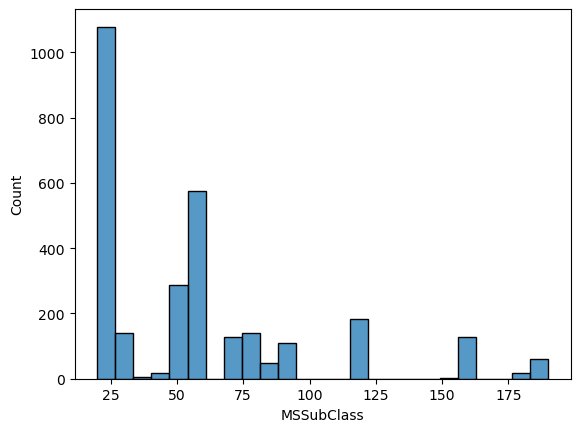

<IPython.core.display.Javascript object>

In [10]:
sns.histplot(x=df["MSSubClass"])

In [11]:
df["MSSubClass"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

In [12]:
df["MSSubClass"] = le.fit_transform(df["MSSubClass"])

<IPython.core.display.Javascript object>

## MSZoning (Общая классификация зонирования)

<AxesSubplot: xlabel='MSZoning', ylabel='count'>

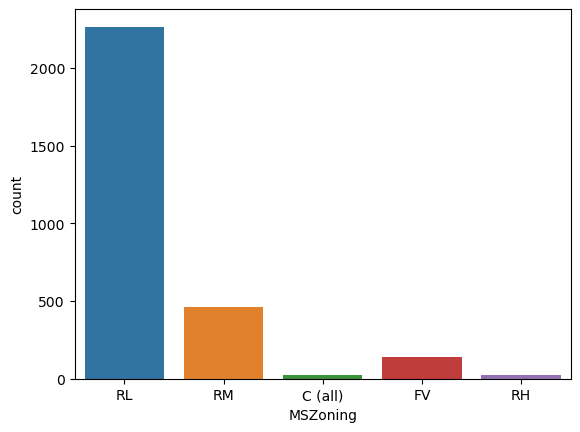

<IPython.core.display.Javascript object>

In [13]:
sns.countplot(x=df["MSZoning"])

In [14]:
df["MSZoning"].value_counts(dropna=False)

RL         2265
RM          460
FV          139
RH           26
C (all)      25
NaN           4
Name: MSZoning, dtype: int64

<IPython.core.display.Javascript object>

In [15]:
df["MSZoning"].fillna("RL", inplace=True)
df["MSZoning"] = le.fit_transform(df["MSZoning"])

<IPython.core.display.Javascript object>

## LotFrontage (Линейные метры улицы, соединенной с недвижимостью)

<AxesSubplot: xlabel='LotFrontage', ylabel='Count'>

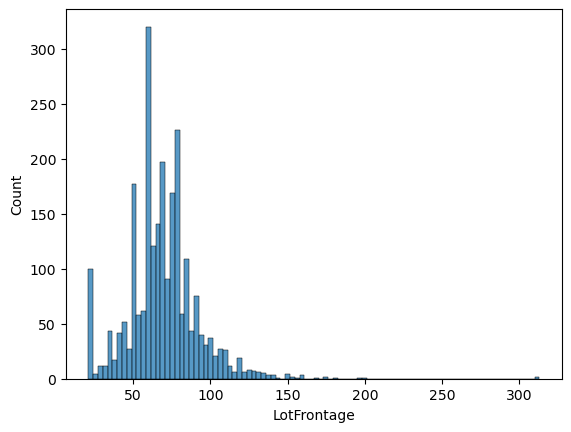

<IPython.core.display.Javascript object>

In [16]:
sns.histplot(x=df["LotFrontage"])

In [17]:
df["LotFrontage"].isna().sum() / len(df)

0.16649537512846865

<IPython.core.display.Javascript object>

In [18]:
df[df["LotFrontage"].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,isTest
Id,,,,,,,,,,,,,,,,,,,,,
8,5,3,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0,0
13,0,3,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,144000.0,0
15,0,3,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000.0,0
17,0,3,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,NaN,NaN,Shed,700,3,2010,WD,Normal,149000.0,0
25,0,3,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,0,3,NaN,11088,Pave,NaN,Reg,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,1
2851,5,3,NaN,21533,Pave,NaN,IR2,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,8,2006,WD,Normal,NaN,1
2901,0,3,NaN,50102,Pave,NaN,IR1,Low,AllPub,Inside,...,NaN,NaN,NaN,0,3,2006,WD,Alloca,NaN,1


<IPython.core.display.Javascript object>

In [19]:
df["LotFrontage"].fillna(df["LotFrontage"].mean(), inplace=True)

<IPython.core.display.Javascript object>

## LotArea (Размер лота в квадратных футах)

<AxesSubplot: xlabel='LotArea', ylabel='Count'>

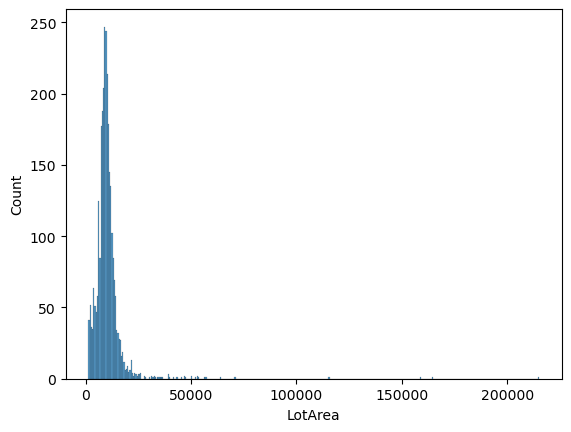

<IPython.core.display.Javascript object>

In [20]:
sns.histplot(x=df["LotArea"])

In [21]:
df["LotArea"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

## Street (Тип подъездной дороги)

<AxesSubplot: xlabel='Street', ylabel='count'>

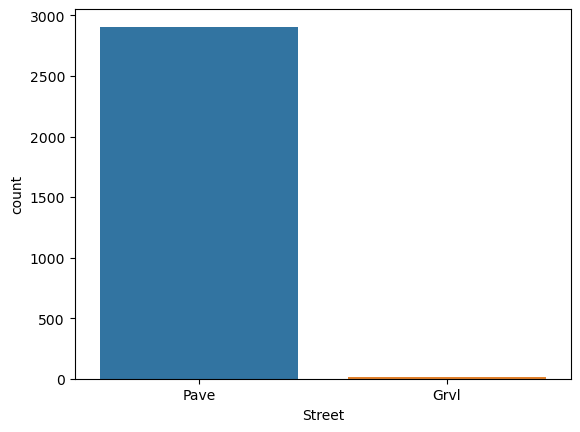

<IPython.core.display.Javascript object>

In [22]:
sns.countplot(x=df["Street"])

In [23]:
df["Street"].value_counts(dropna=False)

Pave    2907
Grvl      12
Name: Street, dtype: int64

<IPython.core.display.Javascript object>

In [24]:
df["Street"] = le.fit_transform(df["Street"])

<IPython.core.display.Javascript object>

## Alley (Тип подъезда к аллее)

<AxesSubplot: xlabel='Alley', ylabel='count'>

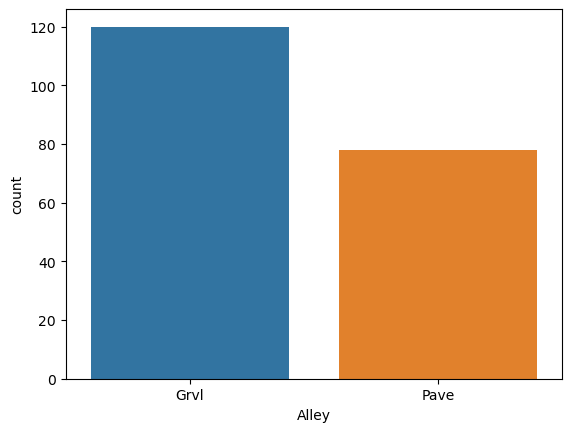

<IPython.core.display.Javascript object>

In [25]:
sns.countplot(x=df["Alley"])

In [26]:
df["Alley"].value_counts(dropna=False)

NaN     2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

<IPython.core.display.Javascript object>

In [27]:
df["Alley"] = le.fit_transform(df["Alley"])

<IPython.core.display.Javascript object>

## LotShape (Общий вид собственности)

<AxesSubplot: xlabel='LotShape', ylabel='count'>

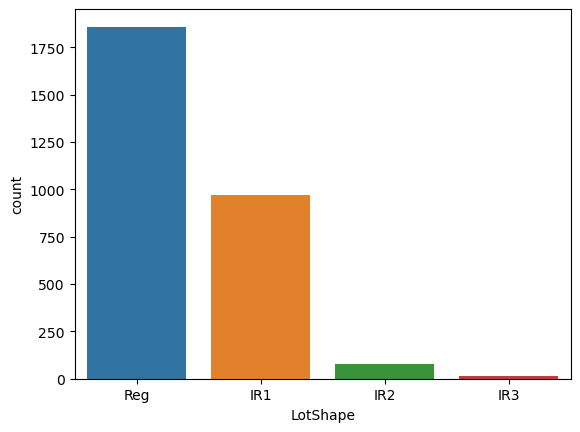

<IPython.core.display.Javascript object>

In [28]:
sns.countplot(x=df["LotShape"])

In [29]:
df["LotShape"].value_counts(dropna=False)

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
df["LotShape"] = le.fit_transform(df["LotShape"])

<IPython.core.display.Javascript object>

## LandContour (Плоскостность объекта недвижимости)

<AxesSubplot: xlabel='LandContour', ylabel='count'>

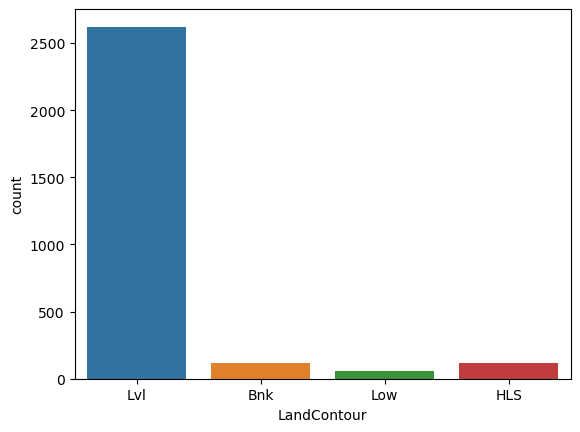

<IPython.core.display.Javascript object>

In [31]:
sns.countplot(x=df["LandContour"])

In [32]:
df["LandContour"].value_counts(dropna=False)

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

<IPython.core.display.Javascript object>

In [33]:
df["LandContour"] = le.fit_transform(df["LandContour"])

<IPython.core.display.Javascript object>

## Utilities (Тип доступных коммунальных услуг)

<AxesSubplot: xlabel='Utilities', ylabel='count'>

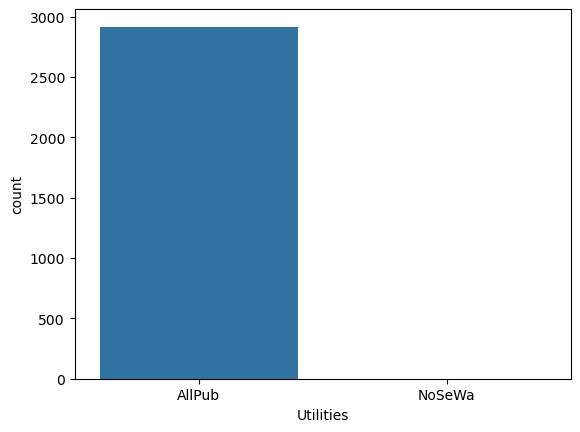

<IPython.core.display.Javascript object>

In [34]:
sns.countplot(x=df["Utilities"])

In [35]:
df["Utilities"].value_counts(dropna=False)

AllPub    2916
NaN          2
NoSeWa       1
Name: Utilities, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["Utilities"] = le.fit_transform(df["Utilities"])

<IPython.core.display.Javascript object>

## LotConfig (Конфигурация лота)

<AxesSubplot: xlabel='LotConfig', ylabel='count'>

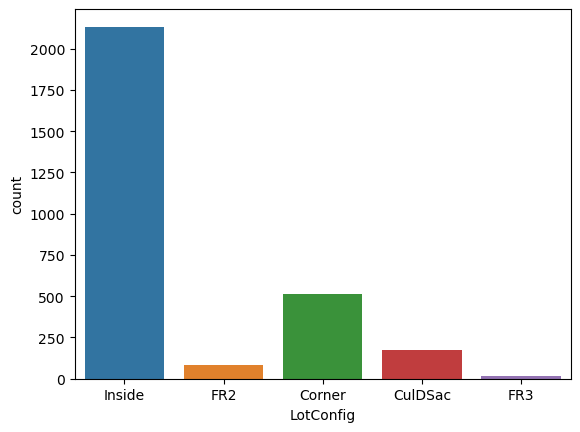

<IPython.core.display.Javascript object>

In [37]:
sns.countplot(x=df["LotConfig"])

In [38]:
df["LotConfig"].value_counts(dropna=False)

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

<IPython.core.display.Javascript object>

In [39]:
df["LotConfig"] = le.fit_transform(df["LotConfig"])

<IPython.core.display.Javascript object>

## LandSlope (Наклон собственности)

<AxesSubplot: xlabel='LandSlope', ylabel='count'>

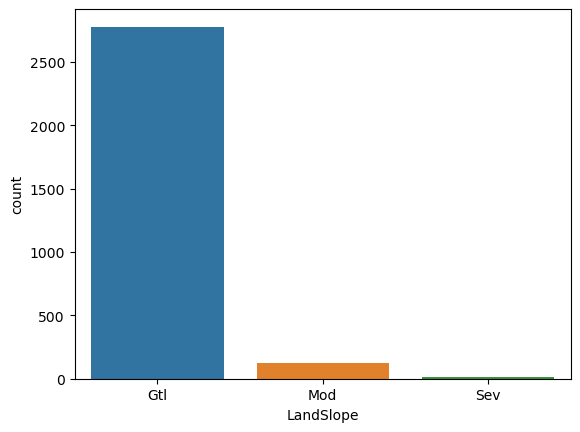

<IPython.core.display.Javascript object>

In [40]:
sns.countplot(x=df["LandSlope"])

In [41]:
df["LandSlope"].value_counts(dropna=False)

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

<IPython.core.display.Javascript object>

In [42]:
df["LandSlope"] = le.fit_transform(df["LandSlope"])

<IPython.core.display.Javascript object>

## Neighborhood (Физические местоположения в пределах города Эймс)

<AxesSubplot: xlabel='count', ylabel='Neighborhood'>

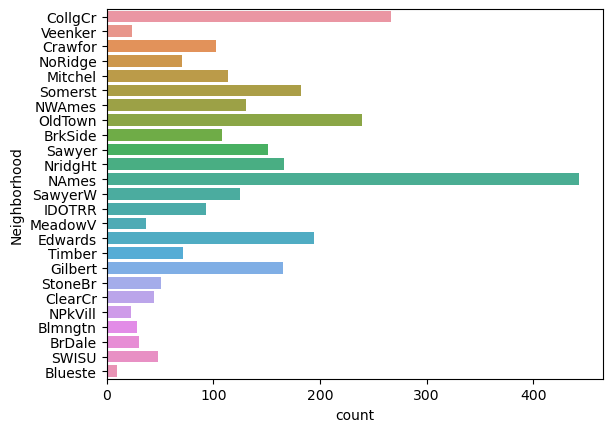

<IPython.core.display.Javascript object>

In [43]:
sns.countplot(y=df["Neighborhood"])

In [44]:
df["Neighborhood"].value_counts(dropna=False)

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

<IPython.core.display.Javascript object>

In [45]:
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])

<IPython.core.display.Javascript object>

## Condition1 (Близость к главной дороге или железной дороге)

<AxesSubplot: xlabel='Condition1', ylabel='count'>

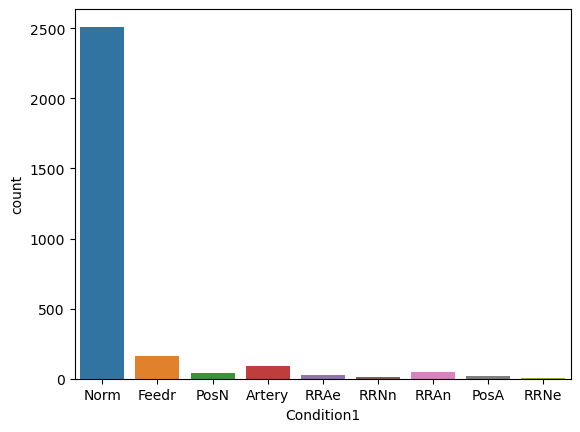

<IPython.core.display.Javascript object>

In [46]:
sns.countplot(x=df["Condition1"])

In [47]:
df["Condition1"].value_counts(dropna=False)

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

<IPython.core.display.Javascript object>

In [48]:
df["Condition1"] = le.fit_transform(df["Condition1"])

<IPython.core.display.Javascript object>

## Condition2 (Близость к главной дороге или железной дороге, при наличии второй)

<AxesSubplot: xlabel='Condition2', ylabel='count'>

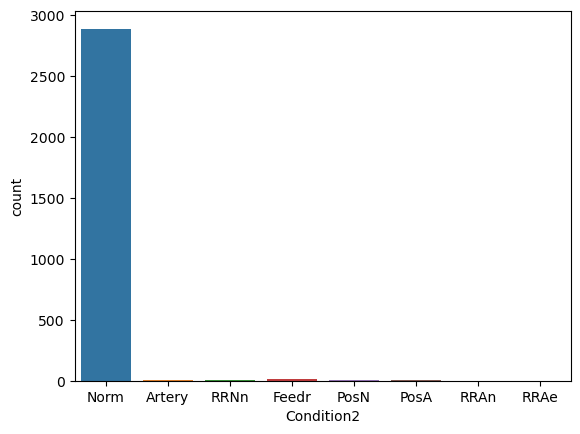

<IPython.core.display.Javascript object>

In [49]:
sns.countplot(x=df["Condition2"])

In [50]:
df["Condition2"].value_counts(dropna=False)

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

<IPython.core.display.Javascript object>

In [51]:
df["Condition2"] = le.fit_transform(df["Condition2"])

<IPython.core.display.Javascript object>

## BldgType (Тип жилья)

<AxesSubplot: xlabel='BldgType', ylabel='count'>

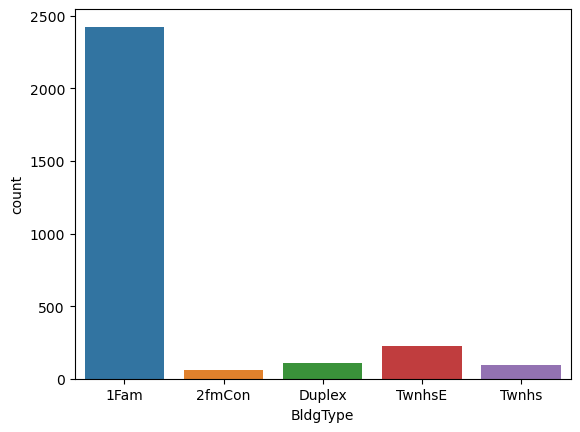

<IPython.core.display.Javascript object>

In [52]:
sns.countplot(x=df["BldgType"])

In [53]:
df["BldgType"].value_counts(dropna=False)

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

<IPython.core.display.Javascript object>

In [54]:
df["BldgType"] = le.fit_transform(df["BldgType"])

<IPython.core.display.Javascript object>

## HouseStyle (Стиль жилья)

<AxesSubplot: xlabel='HouseStyle', ylabel='count'>

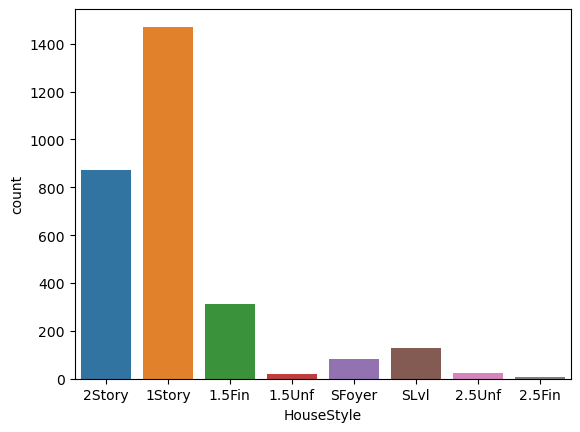

<IPython.core.display.Javascript object>

In [55]:
sns.countplot(x=df["HouseStyle"])

In [56]:
df["HouseStyle"].value_counts(dropna=False)

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

<IPython.core.display.Javascript object>

In [57]:
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])

<IPython.core.display.Javascript object>

## OverallQual (Общее качество материала и отделки)

<AxesSubplot: xlabel='OverallQual', ylabel='count'>

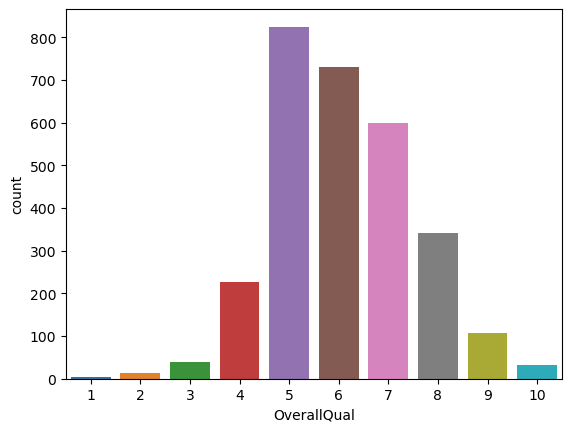

<IPython.core.display.Javascript object>

In [58]:
sns.countplot(x=df["OverallQual"])

In [59]:
df["OverallQual"].value_counts(dropna=False)

5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: OverallQual, dtype: int64

<IPython.core.display.Javascript object>

## OverallCond (Общая оценка состояния)

<AxesSubplot: xlabel='OverallCond', ylabel='count'>

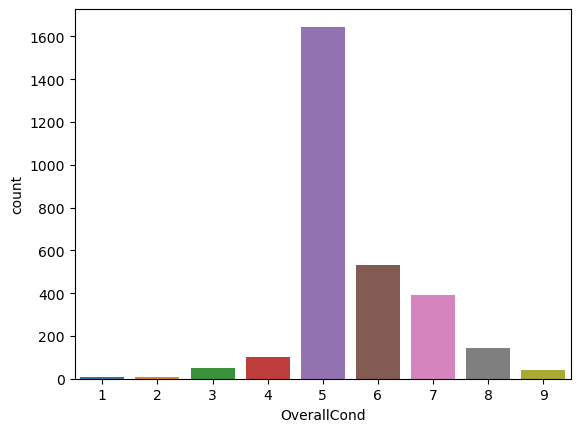

<IPython.core.display.Javascript object>

In [60]:
sns.countplot(x=df["OverallCond"])

In [61]:
df["OverallCond"].value_counts(dropna=False)

5    1645
6     531
7     390
8     144
4     101
3      50
9      41
2      10
1       7
Name: OverallCond, dtype: int64

<IPython.core.display.Javascript object>

## YearBuilt (Первоначальная дата строительства)

<AxesSubplot: xlabel='YearBuilt', ylabel='Count'>

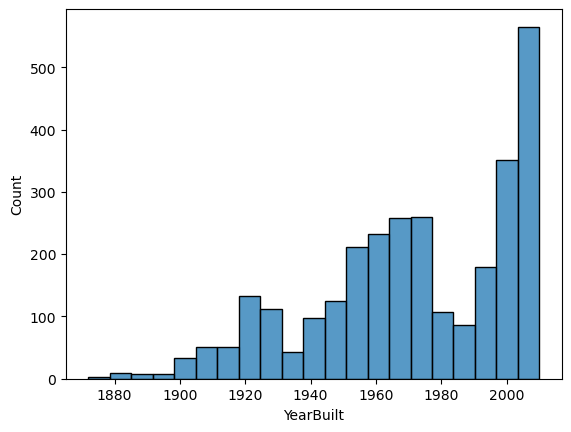

<IPython.core.display.Javascript object>

In [62]:
sns.histplot(x=df["YearBuilt"])

In [63]:
df["YearBuilt"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

In [64]:
df["YearBuilt"] = le.fit_transform(df["YearBuilt"])

<IPython.core.display.Javascript object>

## YearRemodAdd (Дата реконструкции)

<AxesSubplot: xlabel='YearRemodAdd', ylabel='Count'>

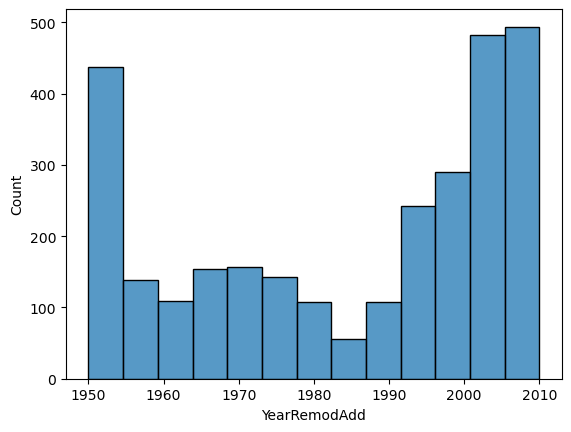

<IPython.core.display.Javascript object>

In [65]:
sns.histplot(x=df["YearRemodAdd"])

In [66]:
df["YearRemodAdd"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

In [67]:
df["YearRemodAdd"] = le.fit_transform(df["YearRemodAdd"])

<IPython.core.display.Javascript object>

## RoofStyle (Тип кровли)

<AxesSubplot: xlabel='RoofStyle', ylabel='count'>

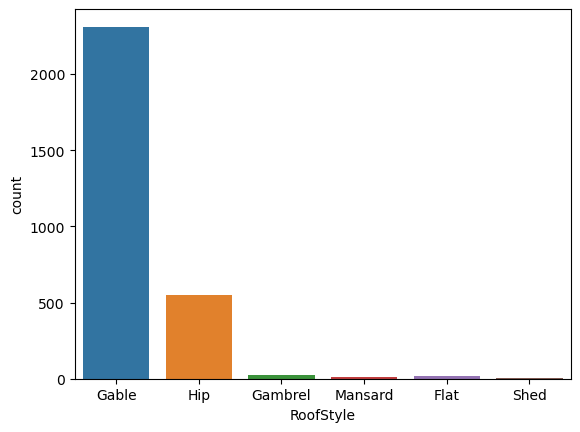

<IPython.core.display.Javascript object>

In [68]:
sns.countplot(x=df["RoofStyle"])

In [69]:
df["RoofStyle"].value_counts(dropna=False)

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

<IPython.core.display.Javascript object>

In [70]:
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])

<IPython.core.display.Javascript object>

## RoofMatl (Материал крыши)

<AxesSubplot: xlabel='RoofMatl', ylabel='count'>

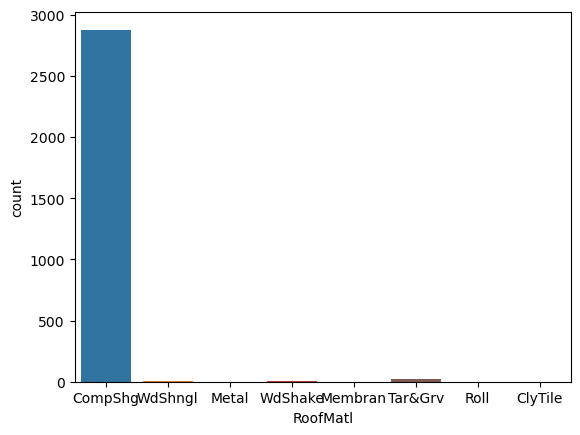

<IPython.core.display.Javascript object>

In [71]:
sns.countplot(x=df["RoofMatl"])

In [72]:
df["RoofMatl"].value_counts(dropna=False)

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

<IPython.core.display.Javascript object>

In [73]:
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])

<IPython.core.display.Javascript object>

## Exterior1st (Наружное покрытие дома)

<AxesSubplot: xlabel='count', ylabel='Exterior1st'>

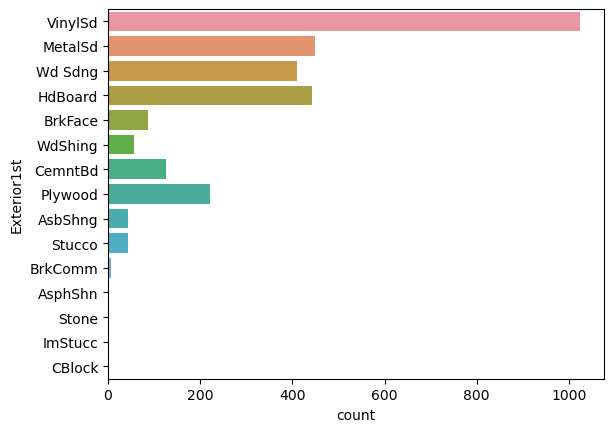

<IPython.core.display.Javascript object>

In [74]:
sns.countplot(y=df["Exterior1st"])

In [75]:
df["Exterior1st"].value_counts(dropna=False)

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
NaN           1
Name: Exterior1st, dtype: int64

<IPython.core.display.Javascript object>

In [76]:
df["Exterior1st"].fillna("VinylSd", inplace=True)
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])

<IPython.core.display.Javascript object>

## Exterior2nd (Наружное покрытие дома, если более одного материала)

<AxesSubplot: xlabel='Exterior2nd', ylabel='count'>

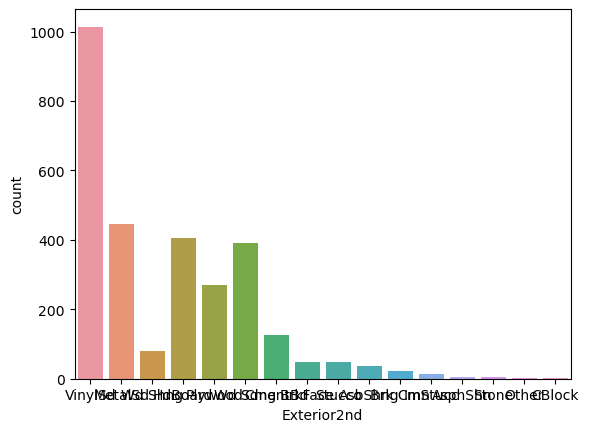

<IPython.core.display.Javascript object>

In [77]:
sns.countplot(x=df["Exterior2nd"])

In [78]:
df["Exterior2nd"].value_counts(dropna=False)

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
NaN           1
Name: Exterior2nd, dtype: int64

<IPython.core.display.Javascript object>

In [79]:
df["Exterior2nd"].fillna("VinylSd", inplace=True)
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])

<IPython.core.display.Javascript object>

## MasVnrType (Тип облицовки кладки)

<AxesSubplot: xlabel='MasVnrType', ylabel='count'>

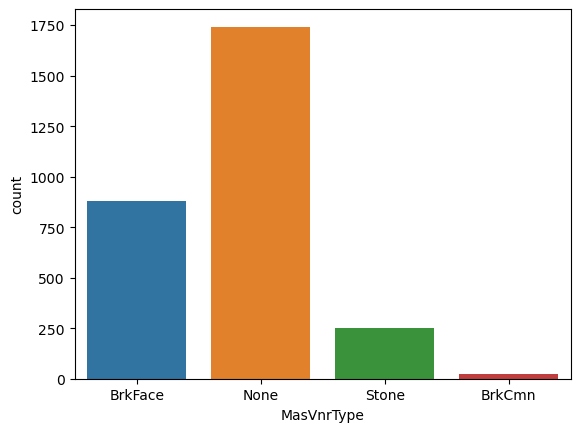

<IPython.core.display.Javascript object>

In [80]:
sns.countplot(x=df["MasVnrType"])

In [81]:
df["MasVnrType"].value_counts(dropna=False)

None       1742
BrkFace     879
Stone       249
BrkCmn       25
NaN          24
Name: MasVnrType, dtype: int64

<IPython.core.display.Javascript object>

In [82]:
df["MasVnrType"].fillna("NA", inplace=True)
df["MasVnrType"] = le.fit_transform(df["MasVnrType"])

<IPython.core.display.Javascript object>

## MasVnrArea (Площадь облицовки кладки в квадратных футах)

<AxesSubplot: xlabel='MasVnrArea'>

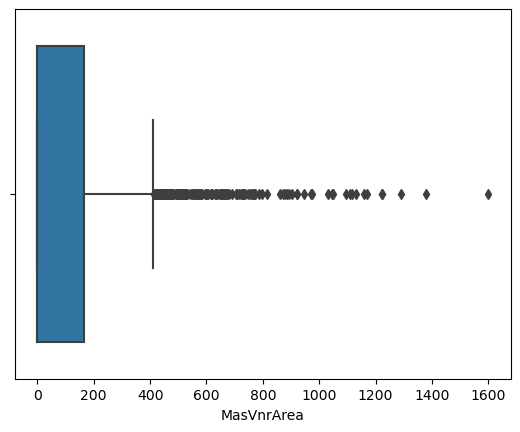

<IPython.core.display.Javascript object>

In [83]:
sns.boxplot(x=df["MasVnrArea"])

In [84]:
df["MasVnrArea"].isna().sum() / len(df)

0.0078794107571086

<IPython.core.display.Javascript object>

In [85]:
df["MasVnrArea"].fillna(df["MasVnrArea"].mean(), inplace=True)

<IPython.core.display.Javascript object>

## ExterQual (Качество наружных материалов)

<AxesSubplot: xlabel='ExterQual', ylabel='count'>

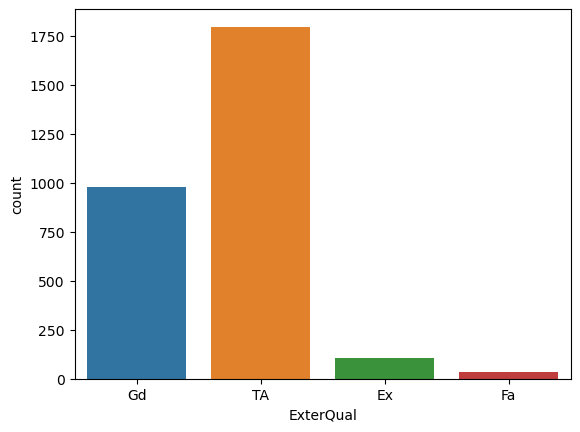

<IPython.core.display.Javascript object>

In [86]:
sns.countplot(x=df["ExterQual"])

In [87]:
df["ExterQual"].value_counts(dropna=False)

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

<IPython.core.display.Javascript object>

In [88]:
df["ExterQual"] = le.fit_transform(df["ExterQual"])

<IPython.core.display.Javascript object>

## ExterCond (Настоящее состояние материала на внешней стороне)

<AxesSubplot: xlabel='ExterCond', ylabel='count'>

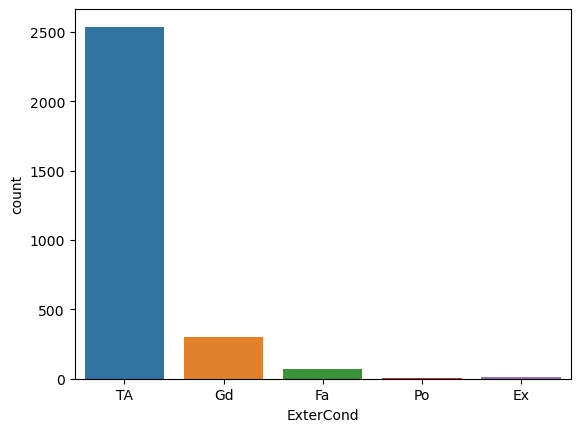

<IPython.core.display.Javascript object>

In [89]:
sns.countplot(x=df["ExterCond"])

In [90]:
df["ExterCond"].value_counts(dropna=False)

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

<IPython.core.display.Javascript object>

In [91]:
df["ExterCond"] = le.fit_transform(df["ExterCond"])

<IPython.core.display.Javascript object>

## Foundation (Тип фундамента)

<AxesSubplot: xlabel='Foundation', ylabel='count'>

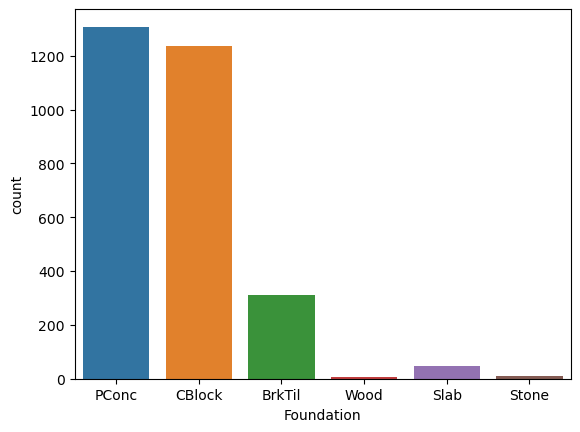

<IPython.core.display.Javascript object>

In [92]:
sns.countplot(x=df["Foundation"])

In [93]:
df["Foundation"].value_counts(dropna=False)

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

<IPython.core.display.Javascript object>

In [94]:
df["Foundation"] = le.fit_transform(df["Foundation"])

<IPython.core.display.Javascript object>

## BsmtQual (Высота подвала)

<AxesSubplot: xlabel='BsmtQual', ylabel='count'>

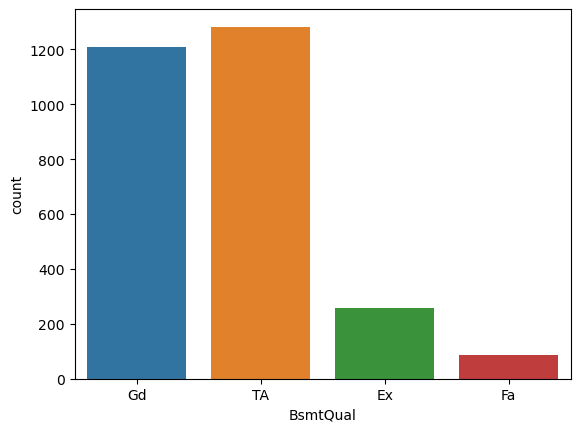

<IPython.core.display.Javascript object>

In [95]:
sns.countplot(x=df["BsmtQual"])

In [96]:
df["BsmtQual"].value_counts(dropna=False)

TA     1283
Gd     1209
Ex      258
Fa       88
NaN      81
Name: BsmtQual, dtype: int64

<IPython.core.display.Javascript object>

In [97]:
df["BsmtQual"].fillna("NA", inplace=True)
df["BsmtQual"] = le.fit_transform(df["BsmtQual"])

<IPython.core.display.Javascript object>

## BsmtCond (Общее состояние подвала)

<AxesSubplot: xlabel='BsmtCond', ylabel='count'>

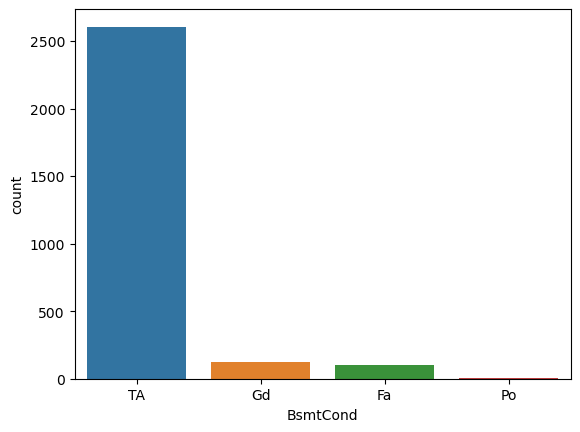

<IPython.core.display.Javascript object>

In [98]:
sns.countplot(x=df["BsmtCond"])

In [99]:
df["BsmtCond"].value_counts(dropna=False)

TA     2606
Gd      122
Fa      104
NaN      82
Po        5
Name: BsmtCond, dtype: int64

<IPython.core.display.Javascript object>

In [100]:
df["BsmtCond"].fillna("NA", inplace=True)
df["BsmtCond"] = le.fit_transform(df["BsmtCond"])

<IPython.core.display.Javascript object>

## BsmtExposure (Стены подвала на уровне пешеходной дорожки или сада)

<AxesSubplot: xlabel='BsmtExposure', ylabel='count'>

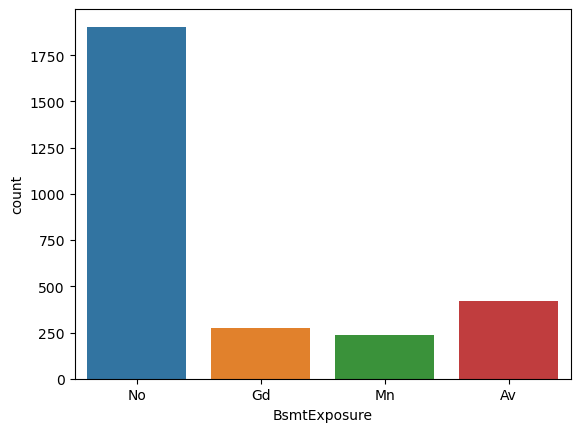

<IPython.core.display.Javascript object>

In [101]:
sns.countplot(x=df["BsmtExposure"])

In [102]:
df["BsmtExposure"].value_counts(dropna=False)

No     1904
Av      418
Gd      276
Mn      239
NaN      82
Name: BsmtExposure, dtype: int64

<IPython.core.display.Javascript object>

In [103]:
df["BsmtExposure"].fillna("NA", inplace=True)
df["BsmtExposure"] = le.fit_transform(df["BsmtExposure"])

<IPython.core.display.Javascript object>

## BsmtFinType1 (Качество готовой площади подвала)

<AxesSubplot: xlabel='BsmtFinType1', ylabel='count'>

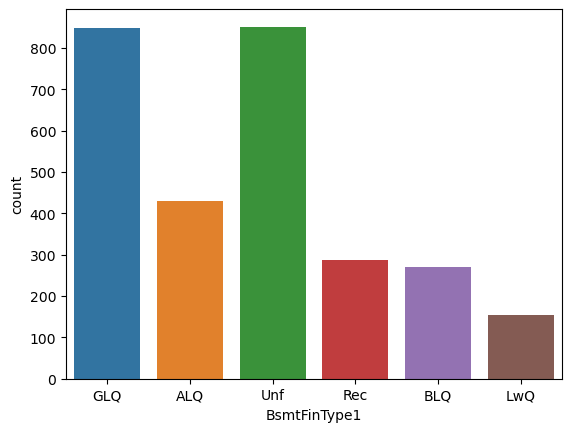

<IPython.core.display.Javascript object>

In [104]:
sns.countplot(x=df["BsmtFinType1"])

In [105]:
df["BsmtFinType1"].value_counts(dropna=False)

Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NaN     79
Name: BsmtFinType1, dtype: int64

<IPython.core.display.Javascript object>

In [106]:
df["BsmtFinType1"].fillna("NA", inplace=True)
df["BsmtFinType1"] = le.fit_transform(df["BsmtFinType1"])

<IPython.core.display.Javascript object>

## BsmtFinSF1 (Тип 1 готовые квадратные футы)

<AxesSubplot: xlabel='BsmtFinSF1'>

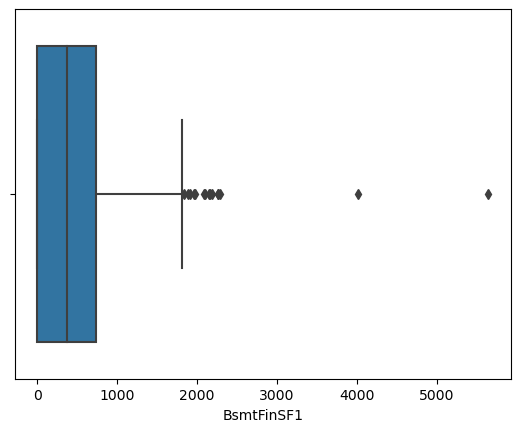

<IPython.core.display.Javascript object>

In [107]:
sns.boxplot(x=df["BsmtFinSF1"])

In [108]:
df["BsmtFinSF1"].isna().sum() / len(df)

0.00034258307639602604

<IPython.core.display.Javascript object>

In [109]:
df["BsmtFinSF1"].fillna(0, inplace=True)

<IPython.core.display.Javascript object>

## BsmtFinType2 (Качество второй готовой площади (при наличии))

<AxesSubplot: xlabel='BsmtFinType2', ylabel='count'>

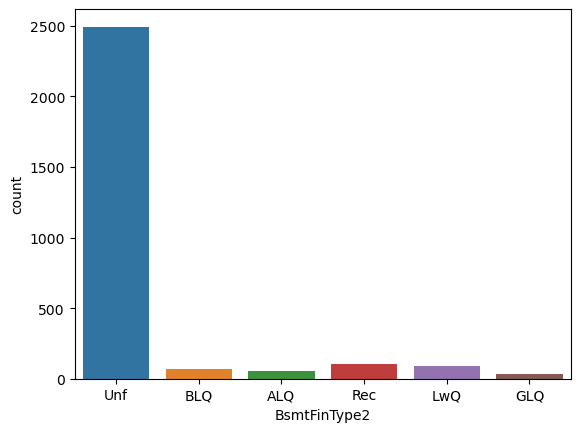

<IPython.core.display.Javascript object>

In [110]:
sns.countplot(x=df["BsmtFinType2"])

In [111]:
df["BsmtFinType2"].value_counts(dropna=False)

Unf    2493
Rec     105
LwQ      87
NaN      80
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64

<IPython.core.display.Javascript object>

In [112]:
df["BsmtFinType2"].fillna("NA", inplace=True)
df["BsmtFinType2"] = le.fit_transform(df["BsmtFinType2"])

<IPython.core.display.Javascript object>

## BsmtFinSF2 (Тип 2 готовые квадратные футы)

<AxesSubplot: xlabel='BsmtFinSF2'>

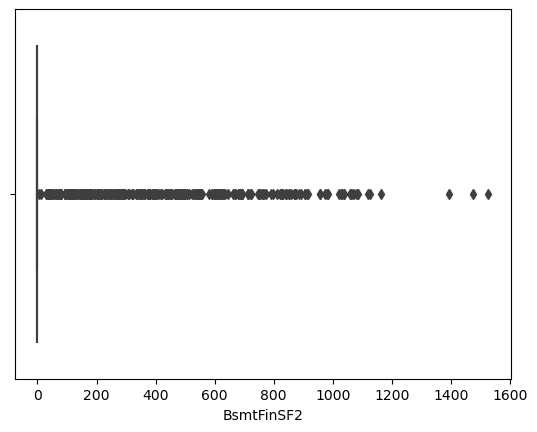

<IPython.core.display.Javascript object>

In [113]:
sns.boxplot(x=df["BsmtFinSF2"])

In [114]:
df["BsmtFinSF2"].isna().sum() / len(df)

0.00034258307639602604

<IPython.core.display.Javascript object>

In [115]:
df["BsmtFinSF2"].fillna(0, inplace=True)

<IPython.core.display.Javascript object>

## BsmtUnfSF (Недостроенные квадратные метры подвальной площади)

<AxesSubplot: xlabel='BsmtUnfSF', ylabel='Count'>

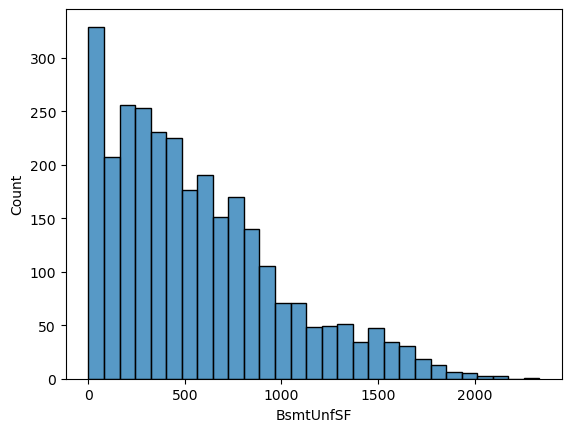

<IPython.core.display.Javascript object>

In [116]:
sns.histplot(x=df["BsmtUnfSF"])

In [117]:
df["BsmtUnfSF"].isna().sum() / len(df)

0.00034258307639602604

<IPython.core.display.Javascript object>

In [118]:
df["BsmtUnfSF"].fillna(0, inplace=True)

<IPython.core.display.Javascript object>

## TotalBsmtSF (Общая площадь подвала в квадратных футах)

<AxesSubplot: xlabel='TotalBsmtSF'>

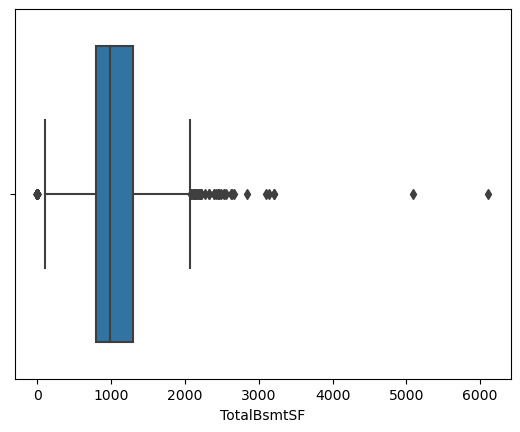

<IPython.core.display.Javascript object>

In [119]:
sns.boxplot(x=df["TotalBsmtSF"])

In [120]:
df["TotalBsmtSF"].isna().sum() / len(df)

0.00034258307639602604

<IPython.core.display.Javascript object>

In [121]:
df["TotalBsmtSF"].fillna(0, inplace=True)

<IPython.core.display.Javascript object>

In [122]:
df["BsmtSFExt"] = (df["TotalBsmtSF"] > 0).astype(int)

<IPython.core.display.Javascript object>

## Heating (Тип отопления)

<AxesSubplot: xlabel='Heating', ylabel='count'>

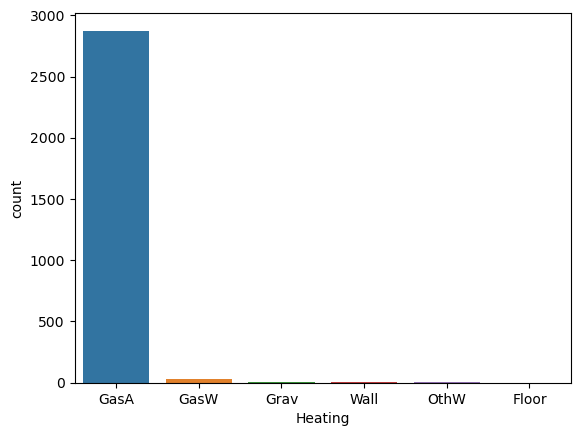

<IPython.core.display.Javascript object>

In [123]:
sns.countplot(x=df["Heating"])

In [124]:
df["Heating"].value_counts(dropna=False)

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

<IPython.core.display.Javascript object>

In [125]:
df["Heating"] = le.fit_transform(df["Heating"])

<IPython.core.display.Javascript object>

## HeatingQC (Качество и состояние отопления)

<AxesSubplot: xlabel='HeatingQC', ylabel='count'>

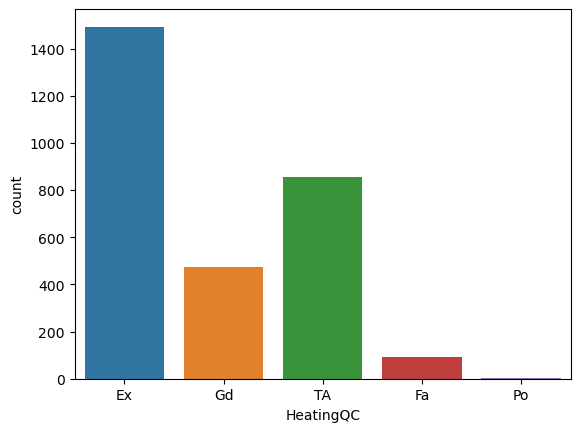

<IPython.core.display.Javascript object>

In [126]:
sns.countplot(x=df["HeatingQC"])

In [127]:
df["HeatingQC"].value_counts(dropna=False)

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

<IPython.core.display.Javascript object>

In [128]:
df["HeatingQC"] = le.fit_transform(df["HeatingQC"])

<IPython.core.display.Javascript object>

## CentralAir (Центральное кондиционирование воздуха)

<AxesSubplot: xlabel='CentralAir', ylabel='count'>

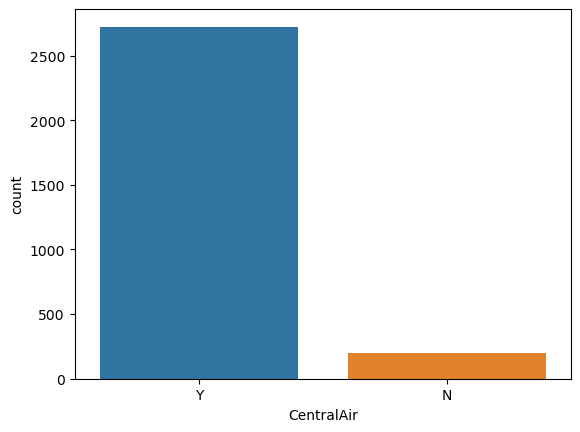

<IPython.core.display.Javascript object>

In [129]:
sns.countplot(x=df["CentralAir"])

In [130]:
df["CentralAir"].value_counts(dropna=False)

Y    2723
N     196
Name: CentralAir, dtype: int64

<IPython.core.display.Javascript object>

In [131]:
df["CentralAir"] = df["CentralAir"].replace({"Y": 1, "N": 0})

<IPython.core.display.Javascript object>

## Electrical (Электрическая система)

<AxesSubplot: xlabel='Electrical', ylabel='count'>

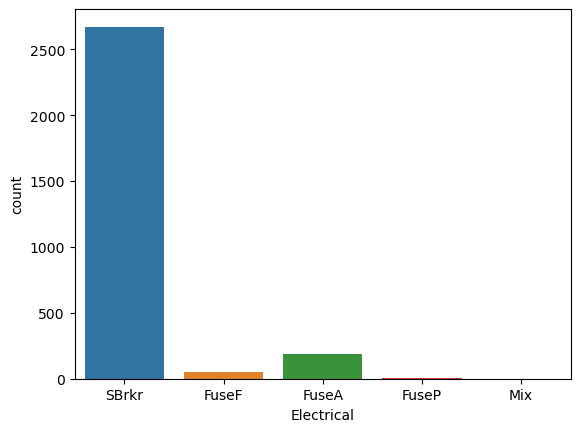

<IPython.core.display.Javascript object>

In [132]:
sns.countplot(x=df["Electrical"])

In [133]:
df["Electrical"].value_counts(dropna=False)

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
NaN         1
Name: Electrical, dtype: int64

<IPython.core.display.Javascript object>

In [134]:
df["Electrical"].fillna("SBrkr", inplace=True)
df["Electrical"] = le.fit_transform(df["Electrical"])

<IPython.core.display.Javascript object>

## 1stFlrSF (Первый этаж квадратных футов)

<AxesSubplot: xlabel='1stFlrSF', ylabel='Count'>

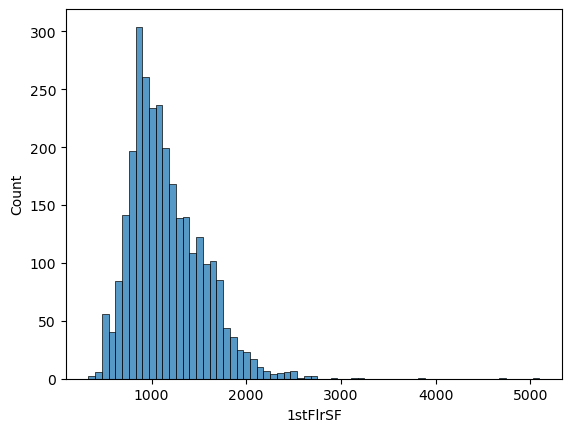

<IPython.core.display.Javascript object>

In [135]:
sns.histplot(x=df["1stFlrSF"])

In [136]:
df["1stFlrSF"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

## 2ndFlrSF (Второй этаж квадратных футов)

<AxesSubplot: xlabel='2ndFlrSF'>

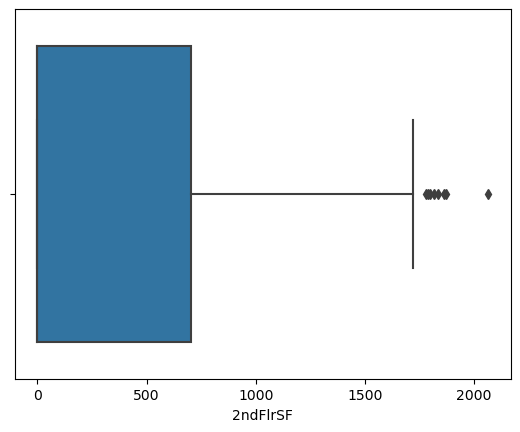

<IPython.core.display.Javascript object>

In [137]:
sns.boxplot(x=df["2ndFlrSF"])

In [138]:
df["2ndFlrSF"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

In [139]:
df["2ndFlrExt"] = (df["2ndFlrSF"] > 0).astype(int)

<IPython.core.display.Javascript object>

## LowQualFinSF (Низкое качество отделки квадратных футов, все этажи)

<AxesSubplot: xlabel='LowQualFinSF'>

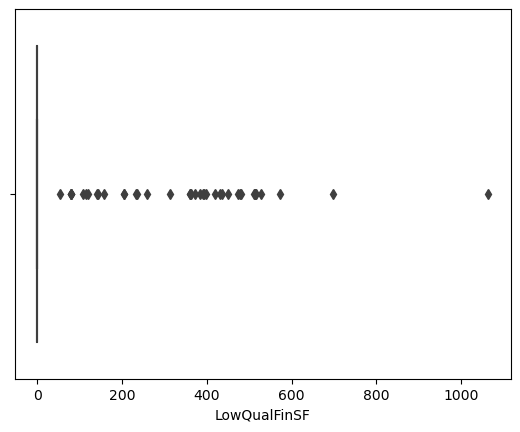

<IPython.core.display.Javascript object>

In [140]:
sns.boxplot(x=df["LowQualFinSF"])

In [141]:
df["LowQualFinSF"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

## GrLivArea (Над классом, земля, жилая площадь квадратных футов)

<AxesSubplot: xlabel='GrLivArea', ylabel='Count'>

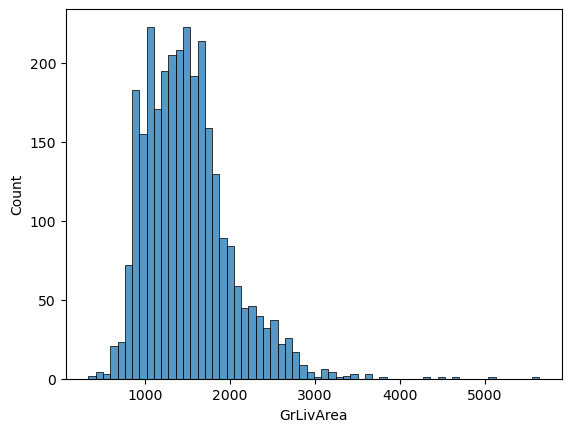

<IPython.core.display.Javascript object>

In [142]:
sns.histplot(x=df["GrLivArea"])

In [143]:
df["GrLivArea"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

## BsmtFullBath (Подвал полностью оборудованные ванные комнаты)

<AxesSubplot: xlabel='BsmtFullBath', ylabel='count'>

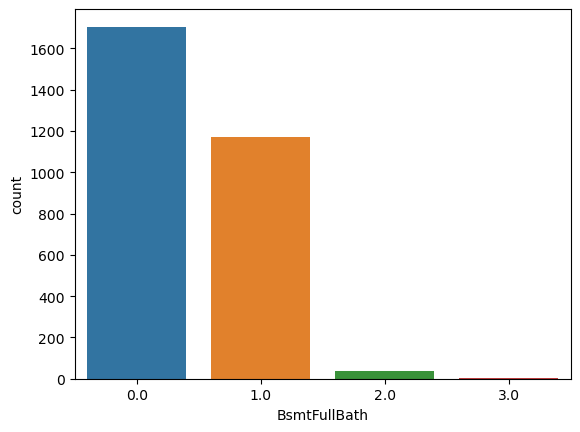

<IPython.core.display.Javascript object>

In [144]:
sns.countplot(x=df["BsmtFullBath"])

In [145]:
df["BsmtFullBath"].value_counts(dropna=False)

0.0    1705
1.0    1172
2.0      38
3.0       2
NaN       2
Name: BsmtFullBath, dtype: int64

<IPython.core.display.Javascript object>

In [146]:
df["BsmtFullBath"].fillna(0, inplace=True)
df["BsmtFullBath"] = df["BsmtFullBath"].astype(int)

<IPython.core.display.Javascript object>

## BsmtHalfBath (Подвал половина ванных комнат)

<AxesSubplot: xlabel='BsmtHalfBath', ylabel='count'>

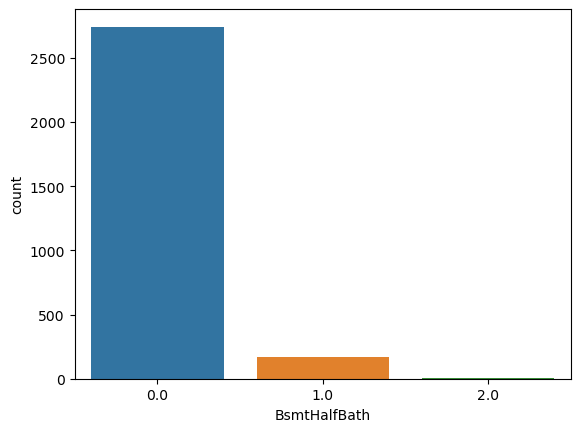

<IPython.core.display.Javascript object>

In [147]:
sns.countplot(x=df["BsmtHalfBath"])

In [148]:
df["BsmtHalfBath"].value_counts(dropna=False)

0.0    2742
1.0     171
2.0       4
NaN       2
Name: BsmtHalfBath, dtype: int64

<IPython.core.display.Javascript object>

In [149]:
df["BsmtHalfBath"].fillna(0, inplace=True)
df["BsmtHalfBath"] = df["BsmtHalfBath"].astype(int)

<IPython.core.display.Javascript object>

## FullBath (Полные ванные комнаты выше класса)

<AxesSubplot: xlabel='FullBath', ylabel='count'>

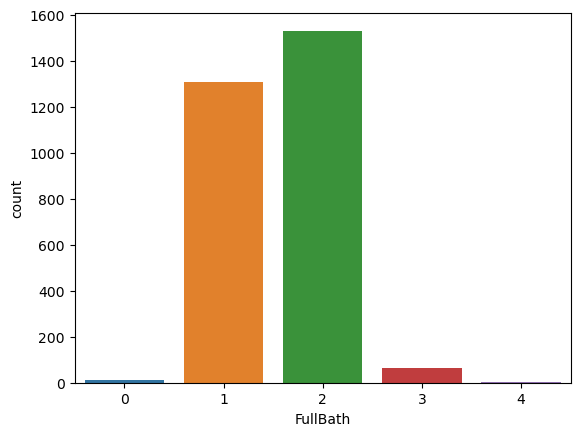

<IPython.core.display.Javascript object>

In [150]:
sns.countplot(x=df["FullBath"])

In [151]:
df["FullBath"].value_counts(dropna=False)

2    1530
1    1309
3      64
0      12
4       4
Name: FullBath, dtype: int64

<IPython.core.display.Javascript object>

## HalfBath (Половина ванн выше класса)

<AxesSubplot: xlabel='HalfBath', ylabel='count'>

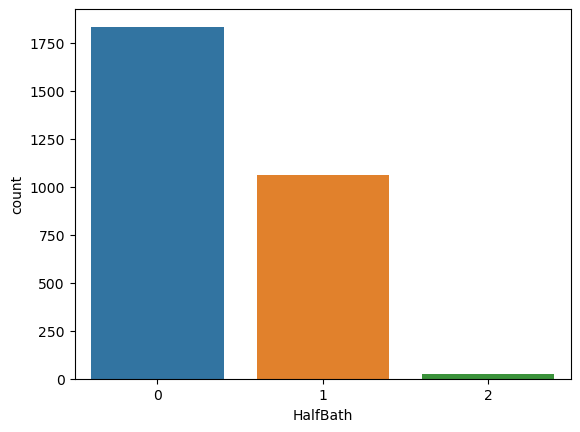

<IPython.core.display.Javascript object>

In [152]:
sns.countplot(x=df["HalfBath"])

In [153]:
df["HalfBath"].value_counts(dropna=False)

0    1834
1    1060
2      25
Name: HalfBath, dtype: int64

<IPython.core.display.Javascript object>

## BedroomAbvGr (Количество спален над цокольным этажом)

<AxesSubplot: xlabel='BedroomAbvGr', ylabel='count'>

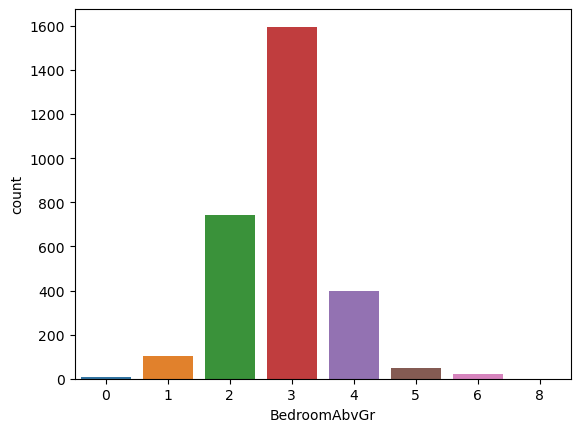

<IPython.core.display.Javascript object>

In [154]:
sns.countplot(x=df["BedroomAbvGr"])

In [155]:
df["BedroomAbvGr"].value_counts(dropna=False)

3    1596
2     742
4     400
1     103
5      48
6      21
0       8
8       1
Name: BedroomAbvGr, dtype: int64

<IPython.core.display.Javascript object>

## KitchenAbvGr (Количество кухонь)

<AxesSubplot: xlabel='KitchenAbvGr', ylabel='count'>

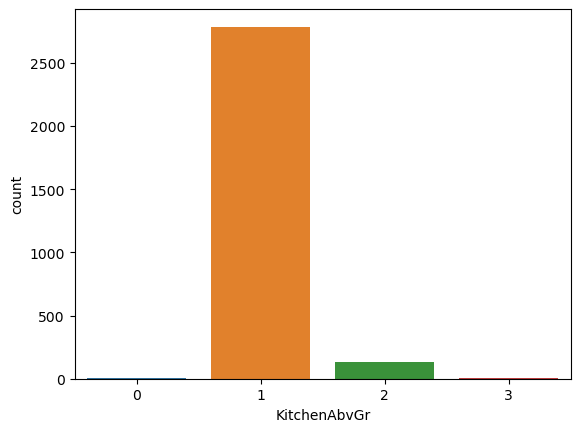

<IPython.core.display.Javascript object>

In [156]:
sns.countplot(x=df["KitchenAbvGr"])

In [157]:
df["KitchenAbvGr"].value_counts(dropna=False)

1    2785
2     129
0       3
3       2
Name: KitchenAbvGr, dtype: int64

<IPython.core.display.Javascript object>

## KitchenQual (Качество кухни)

<AxesSubplot: xlabel='KitchenQual', ylabel='count'>

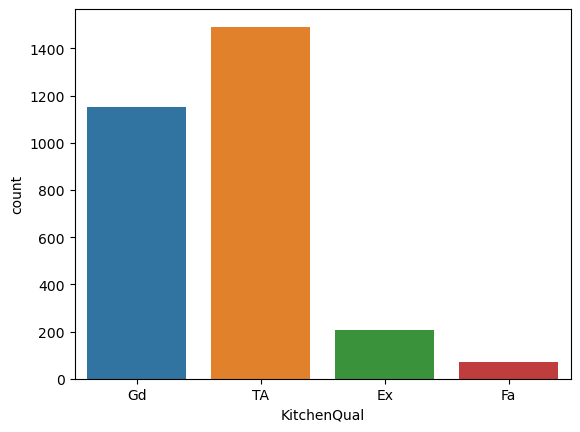

<IPython.core.display.Javascript object>

In [158]:
sns.countplot(x=df["KitchenQual"])

In [159]:
df["KitchenQual"].value_counts(dropna=False)

TA     1492
Gd     1151
Ex      205
Fa       70
NaN       1
Name: KitchenQual, dtype: int64

<IPython.core.display.Javascript object>

In [160]:
df["KitchenQual"].fillna("TA", inplace=True)
df["KitchenQual"] = le.fit_transform(df["KitchenQual"])

<IPython.core.display.Javascript object>

## TotRmsAbvGrd (Всего номеров выше класса, не включает ванные комнаты)

<AxesSubplot: xlabel='TotRmsAbvGrd', ylabel='count'>

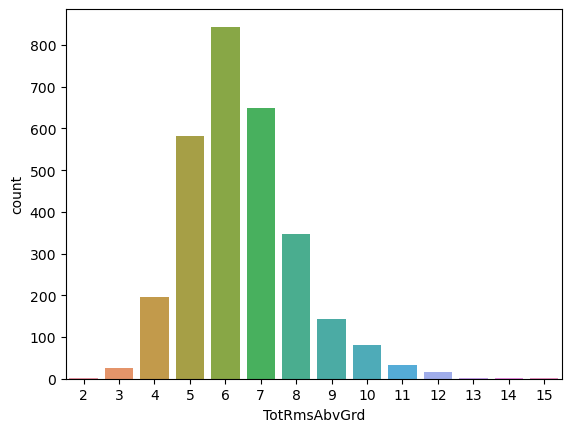

<IPython.core.display.Javascript object>

In [161]:
sns.countplot(x=df["TotRmsAbvGrd"])

In [162]:
df["TotRmsAbvGrd"].value_counts(dropna=False)

6     844
7     649
5     583
8     347
4     196
9     143
10     80
11     32
3      25
12     16
2       1
14      1
13      1
15      1
Name: TotRmsAbvGrd, dtype: int64

<IPython.core.display.Javascript object>

## Functional (Рейтинг домашней функциональности)

<AxesSubplot: xlabel='Functional', ylabel='count'>

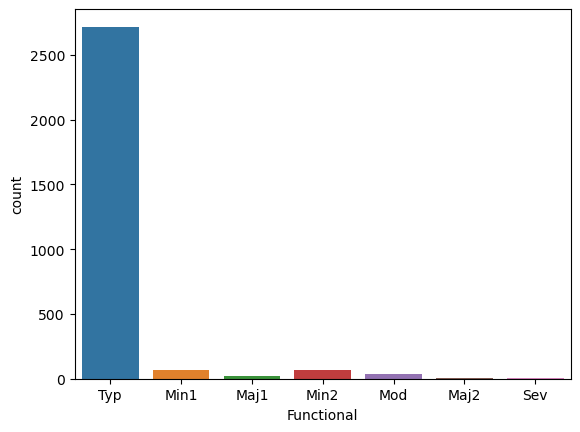

<IPython.core.display.Javascript object>

In [163]:
sns.countplot(x=df["Functional"])

In [164]:
df["Functional"].value_counts(dropna=False)

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
NaN        2
Name: Functional, dtype: int64

<IPython.core.display.Javascript object>

In [165]:
df["Functional"].fillna("Typ", inplace=True)
df["Functional"] = le.fit_transform(df["Functional"])

<IPython.core.display.Javascript object>

## Fireplaces (Количество каминов)

<AxesSubplot: xlabel='Fireplaces', ylabel='count'>

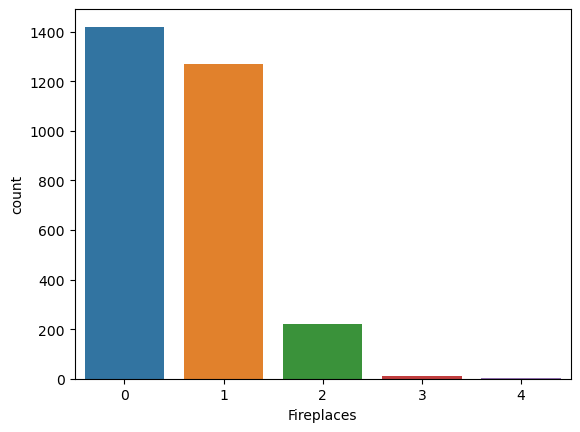

<IPython.core.display.Javascript object>

In [166]:
sns.countplot(x=df["Fireplaces"])

In [167]:
df["Fireplaces"].value_counts(dropna=False)

0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64

<IPython.core.display.Javascript object>

## FireplaceQu (Качество камина)

<AxesSubplot: xlabel='FireplaceQu', ylabel='count'>

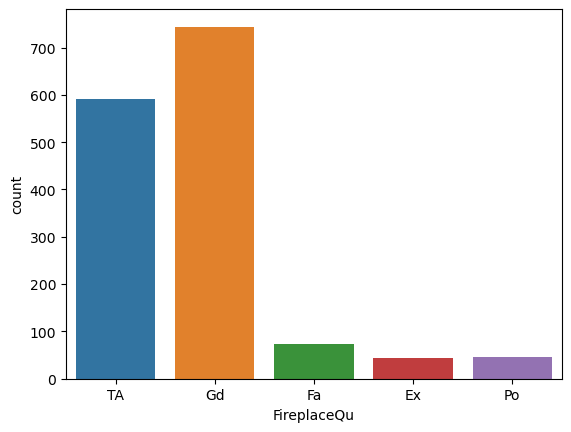

<IPython.core.display.Javascript object>

In [168]:
sns.countplot(x=df["FireplaceQu"])

In [169]:
df["FireplaceQu"].value_counts(dropna=False)

NaN    1420
Gd      744
TA      592
Fa       74
Po       46
Ex       43
Name: FireplaceQu, dtype: int64

<IPython.core.display.Javascript object>

In [170]:
df["FireplaceQu"].fillna("NA", inplace=True)
df["FireplaceQu"] = le.fit_transform(df["FireplaceQu"])

<IPython.core.display.Javascript object>

## GarageType (Расположение гаража)

<AxesSubplot: xlabel='GarageType', ylabel='count'>

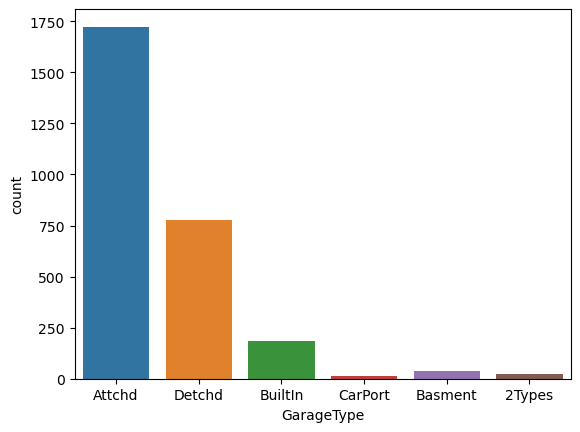

<IPython.core.display.Javascript object>

In [171]:
sns.countplot(x=df["GarageType"])

In [172]:
df["GarageType"].value_counts(dropna=False)

Attchd     1723
Detchd      779
BuiltIn     186
NaN         157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

<IPython.core.display.Javascript object>

In [173]:
df["GarageType"].fillna("NA", inplace=True)
df["GarageType"] = le.fit_transform(df["GarageType"])

<IPython.core.display.Javascript object>

## GarageYrBlt (Год постройки гаража)

<AxesSubplot: xlabel='GarageYrBlt', ylabel='Count'>

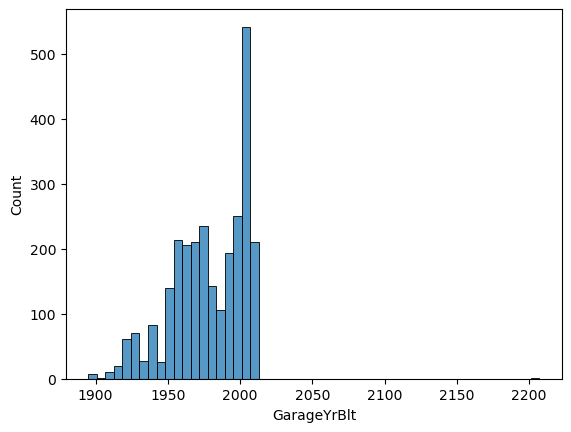

<IPython.core.display.Javascript object>

In [174]:
sns.histplot(x=df["GarageYrBlt"])

In [175]:
df["GarageYrBlt"].isna().sum() / len(df)

0.05447070914696814

<IPython.core.display.Javascript object>

In [176]:
df["GarageYrBlt"].fillna(0, inplace=True)
df["GarageYrBlt"] = df["GarageYrBlt"].astype(int)

<IPython.core.display.Javascript object>

In [177]:
df["GarageYrBlt"] = le.fit_transform(df["GarageYrBlt"])

<IPython.core.display.Javascript object>

## GarageFinish (Внутренняя отделка гаража)

<AxesSubplot: xlabel='GarageFinish', ylabel='count'>

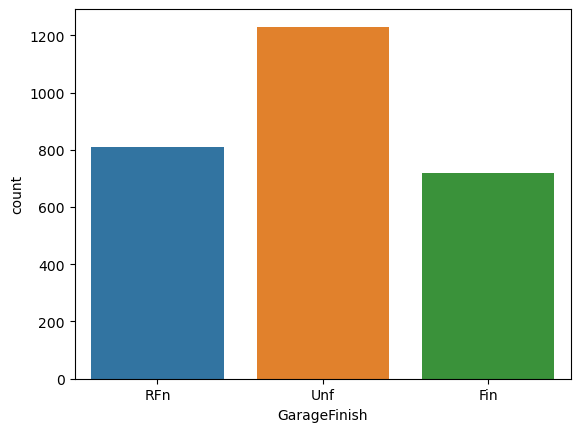

<IPython.core.display.Javascript object>

In [178]:
sns.countplot(x=df["GarageFinish"])

In [179]:
df["GarageFinish"].value_counts(dropna=False)

Unf    1230
RFn     811
Fin     719
NaN     159
Name: GarageFinish, dtype: int64

<IPython.core.display.Javascript object>

In [180]:
df["GarageFinish"].fillna("NA", inplace=True)
df["GarageFinish"] = le.fit_transform(df["GarageFinish"])

<IPython.core.display.Javascript object>

## GarageCars (Размер гаража в машиноместе)

<AxesSubplot: xlabel='GarageCars', ylabel='count'>

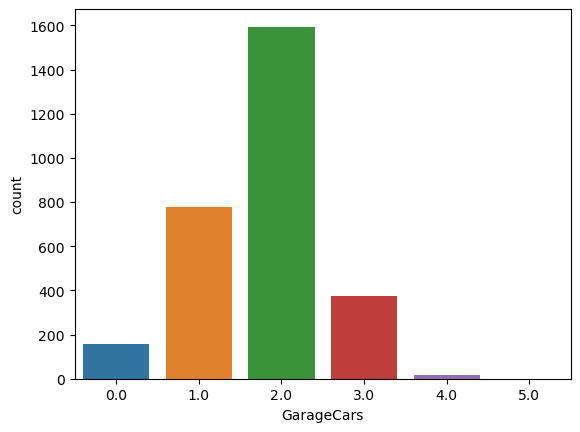

<IPython.core.display.Javascript object>

In [181]:
sns.countplot(x=df["GarageCars"])

In [182]:
df["GarageCars"].value_counts(dropna=False)

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
NaN       1
Name: GarageCars, dtype: int64

<IPython.core.display.Javascript object>

In [183]:
df["GarageCars"].fillna(0.0, inplace=True)
df["GarageCars"] = df["GarageCars"].astype(int)

<IPython.core.display.Javascript object>

## GarageArea (Размер гаража в квадратных футах)

<AxesSubplot: xlabel='GarageArea', ylabel='Count'>

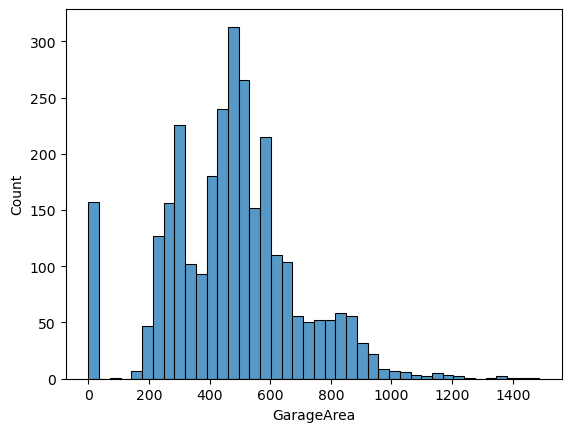

<IPython.core.display.Javascript object>

In [184]:
sns.histplot(x=df["GarageArea"])

In [185]:
df["GarageArea"].isna().sum() / len(df)

0.00034258307639602604

<IPython.core.display.Javascript object>

In [186]:
df["GarageArea"].fillna(0, inplace=True)

<IPython.core.display.Javascript object>

## GarageQual (Гаражное качество)

<AxesSubplot: xlabel='GarageQual', ylabel='count'>

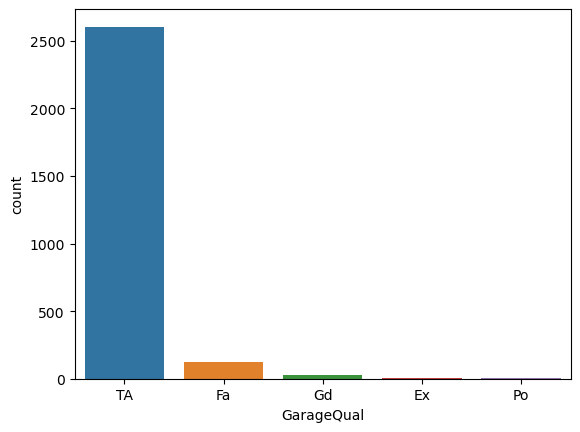

<IPython.core.display.Javascript object>

In [187]:
sns.countplot(x=df["GarageQual"])

In [188]:
df["GarageQual"].value_counts(dropna=False)

TA     2604
NaN     159
Fa      124
Gd       24
Po        5
Ex        3
Name: GarageQual, dtype: int64

<IPython.core.display.Javascript object>

In [189]:
df["GarageQual"].fillna("NA", inplace=True)
df["GarageQual"] = le.fit_transform(df["GarageQual"])

<IPython.core.display.Javascript object>

## GarageCond (Состояние гаража)

<AxesSubplot: xlabel='GarageCond', ylabel='count'>

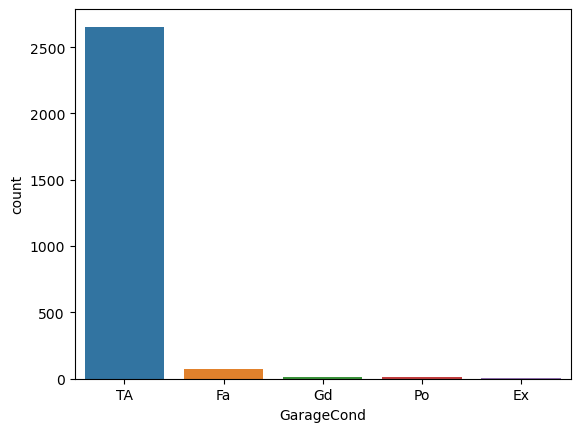

<IPython.core.display.Javascript object>

In [190]:
sns.countplot(x=df["GarageCond"])

In [191]:
df["GarageCond"].value_counts(dropna=False)

TA     2654
NaN     159
Fa       74
Gd       15
Po       14
Ex        3
Name: GarageCond, dtype: int64

<IPython.core.display.Javascript object>

In [192]:
df["GarageCond"].fillna("NA", inplace=True)
df["GarageCond"] = le.fit_transform(df["GarageCond"])

<IPython.core.display.Javascript object>

## PavedDrive (Асфальтированная подъездная дорожка)

<AxesSubplot: xlabel='PavedDrive', ylabel='count'>

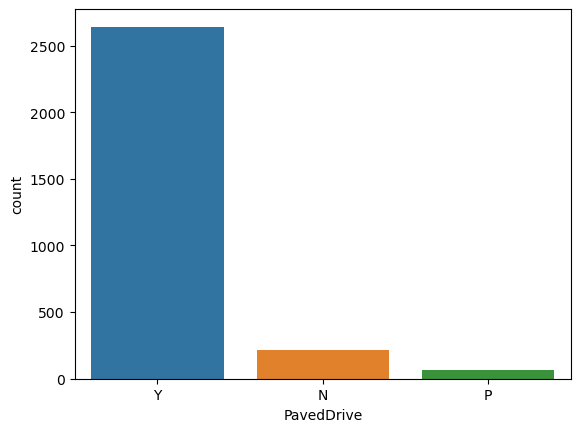

<IPython.core.display.Javascript object>

In [193]:
sns.countplot(x=df["PavedDrive"])

In [194]:
df["PavedDrive"].value_counts(dropna=False)

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

<IPython.core.display.Javascript object>

In [195]:
df["PavedDrive"] = le.fit_transform(df["PavedDrive"])

<IPython.core.display.Javascript object>

## WoodDeckSF (Площадь деревянной палубы в квадратных футах)

<AxesSubplot: xlabel='WoodDeckSF'>

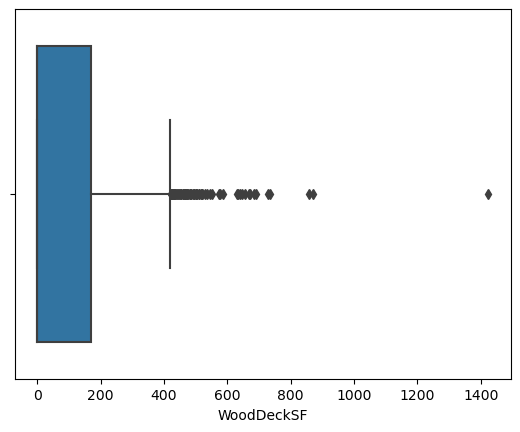

<IPython.core.display.Javascript object>

In [196]:
sns.boxplot(x=df["WoodDeckSF"])

In [197]:
df["WoodDeckSF"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

## OpenPorchSF (Открытая площадь крыльца в квадратных футах)

<AxesSubplot: xlabel='OpenPorchSF'>

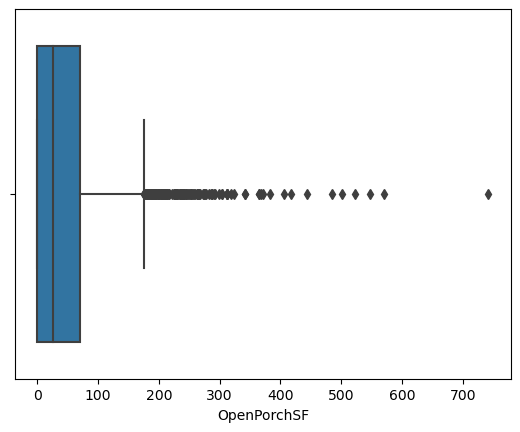

<IPython.core.display.Javascript object>

In [198]:
sns.boxplot(x=df["OpenPorchSF"])

In [199]:
df["OpenPorchSF"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

## EnclosedPorch (Закрытая площадь крыльца в квадратных футах)

<AxesSubplot: xlabel='EnclosedPorch', ylabel='Count'>

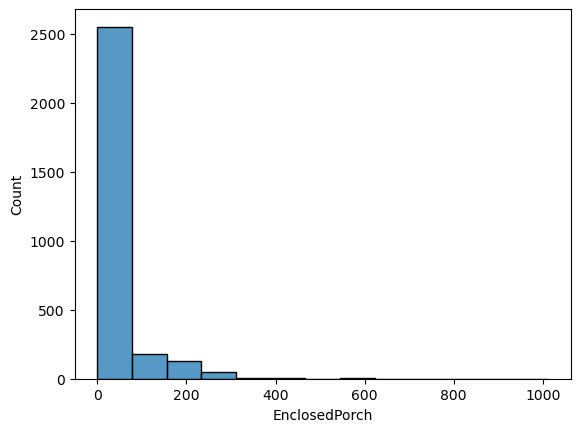

<IPython.core.display.Javascript object>

In [200]:
sns.histplot(x=df["EnclosedPorch"])

In [201]:
df["EnclosedPorch"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

## 3SsnPorch (Площадь трехсезонного крыльца в квадратных футах)

<AxesSubplot: xlabel='3SsnPorch'>

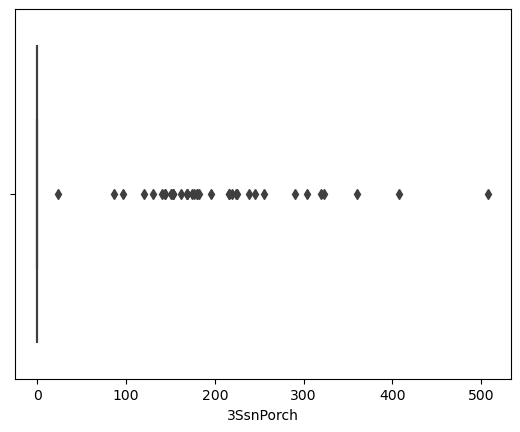

<IPython.core.display.Javascript object>

In [202]:
sns.boxplot(x=df["3SsnPorch"])

In [203]:
df["3SsnPorch"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

## ScreenPorch (Площадь крыльца экрана в квадратных футах)

<AxesSubplot: xlabel='ScreenPorch', ylabel='Count'>

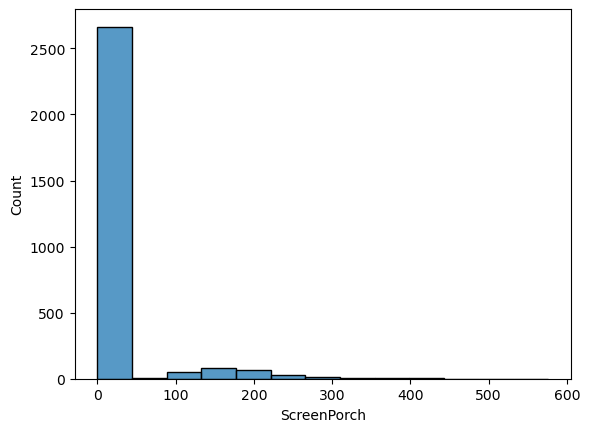

<IPython.core.display.Javascript object>

In [204]:
sns.histplot(x=df["ScreenPorch"])

In [205]:
df["ScreenPorch"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

## PoolArea (Площадь бассейна в квадратных футах)

<AxesSubplot: xlabel='PoolArea', ylabel='Count'>

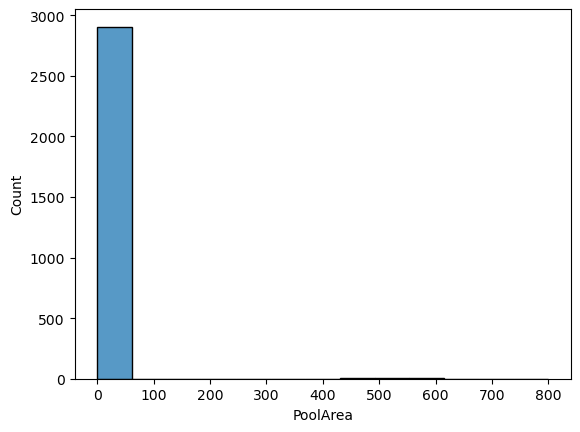

<IPython.core.display.Javascript object>

In [206]:
sns.histplot(x=df["PoolArea"])

In [207]:
df["PoolArea"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

In [208]:
df["PoolExt"] = (df["PoolArea"] > 0).astype(int)

<IPython.core.display.Javascript object>

## PoolQC (Качество бассейна)

<AxesSubplot: xlabel='PoolQC', ylabel='count'>

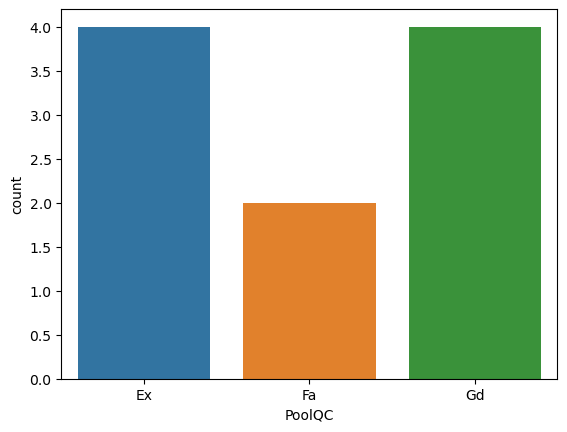

<IPython.core.display.Javascript object>

In [209]:
sns.countplot(x=df["PoolQC"])

In [210]:
df["PoolQC"].value_counts(dropna=False)

NaN    2909
Ex        4
Gd        4
Fa        2
Name: PoolQC, dtype: int64

<IPython.core.display.Javascript object>

In [211]:
df["PoolQC"].fillna("NA", inplace=True)
df["PoolQC"] = le.fit_transform(df["PoolQC"])

<IPython.core.display.Javascript object>

## Fence (Качество забора)

<AxesSubplot: xlabel='Fence', ylabel='count'>

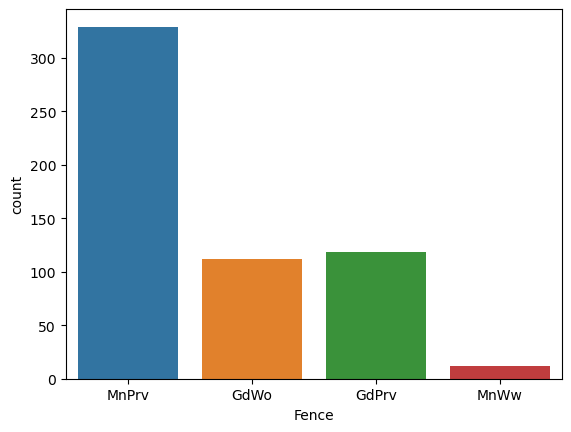

<IPython.core.display.Javascript object>

In [212]:
sns.countplot(x=df["Fence"])

In [213]:
df["Fence"].value_counts(dropna=False)

NaN      2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

<IPython.core.display.Javascript object>

In [214]:
df["Fence"].fillna("NA", inplace=True)
df["Fence"] = le.fit_transform(df["Fence"])

<IPython.core.display.Javascript object>

## MiscFeature (Разное функция, не охватываемая другими категориями)

<AxesSubplot: xlabel='MiscFeature', ylabel='count'>

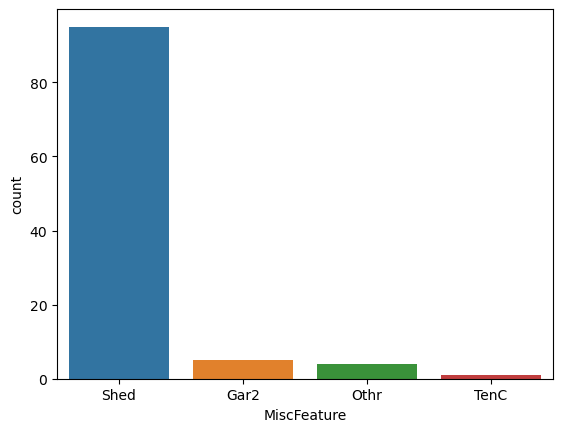

<IPython.core.display.Javascript object>

In [215]:
sns.countplot(x=df["MiscFeature"])

In [216]:
df["MiscFeature"].value_counts(dropna=False)

NaN     2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

<IPython.core.display.Javascript object>

In [217]:
df["MiscFeature"].fillna("NA", inplace=True)
df["MiscFeature"] = le.fit_transform(df["MiscFeature"])

<IPython.core.display.Javascript object>

## MiscVal (Значение функции miscellaneous)

<AxesSubplot: xlabel='MiscVal', ylabel='Count'>

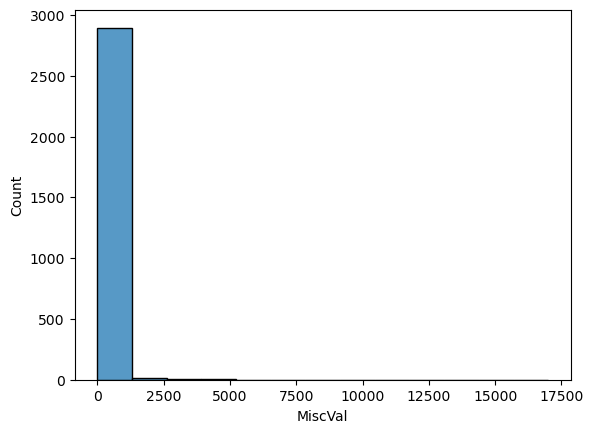

<IPython.core.display.Javascript object>

In [218]:
sns.histplot(x=df["MiscVal"])

In [219]:
df["MiscVal"].isna().sum() / len(df)

0.0

<IPython.core.display.Javascript object>

## MoSold (Месяц продажи)

<AxesSubplot: xlabel='MoSold', ylabel='count'>

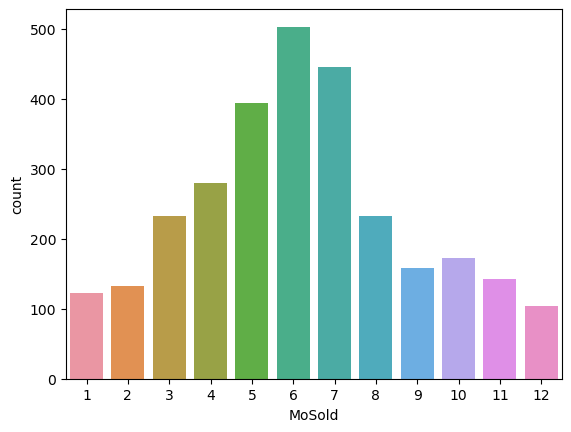

<IPython.core.display.Javascript object>

In [220]:
sns.countplot(x=df["MoSold"])

In [221]:
df["MoSold"].value_counts(dropna=False)

6     503
7     446
5     394
4     279
8     233
3     232
10    173
9     158
11    142
2     133
1     122
12    104
Name: MoSold, dtype: int64

<IPython.core.display.Javascript object>

## YrSold (Год продажи)

<AxesSubplot: xlabel='YrSold', ylabel='count'>

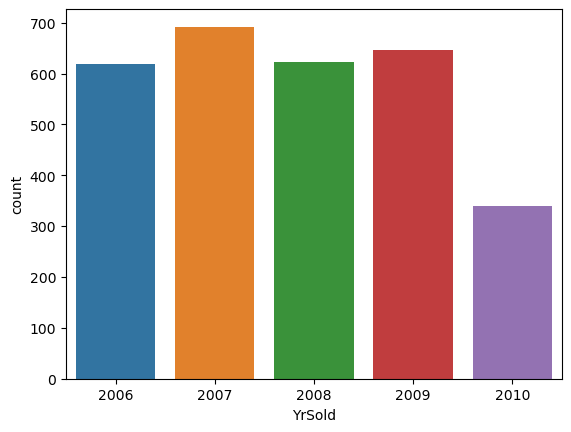

<IPython.core.display.Javascript object>

In [222]:
sns.countplot(x=df["YrSold"])

In [223]:
df["YrSold"].value_counts(dropna=False)

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

<IPython.core.display.Javascript object>

In [224]:
df["YrSold"] = le.fit_transform(df["YrSold"])

<IPython.core.display.Javascript object>

## SaleType (Тип продажи)

<AxesSubplot: xlabel='SaleType', ylabel='count'>

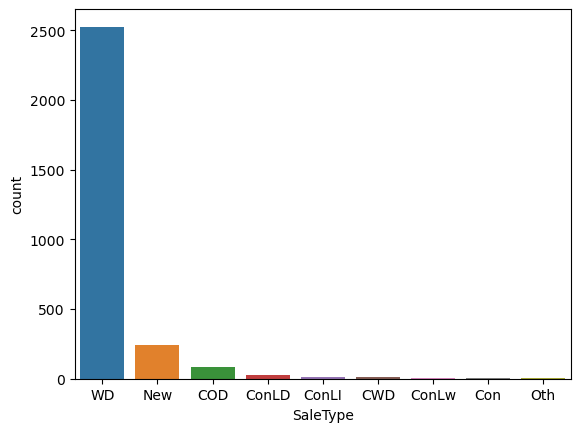

<IPython.core.display.Javascript object>

In [225]:
sns.countplot(x=df["SaleType"])

In [226]:
df["SaleType"].value_counts(dropna=False)

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
NaN         1
Name: SaleType, dtype: int64

<IPython.core.display.Javascript object>

In [227]:
df["SaleType"].fillna("Oth", inplace=True)
df["SaleType"] = le.fit_transform(df["SaleType"])

<IPython.core.display.Javascript object>

## SaleCondition (Условия продажи)

<AxesSubplot: xlabel='SaleCondition', ylabel='count'>

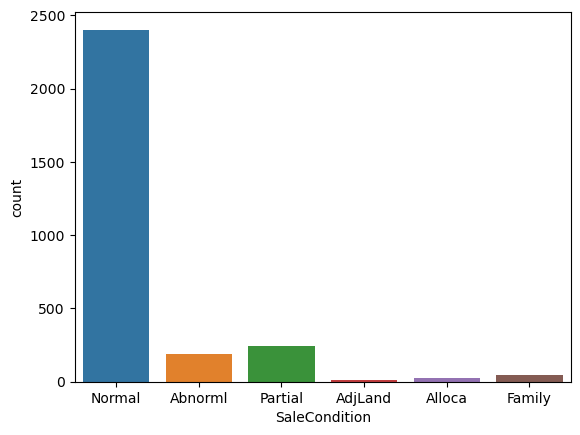

<IPython.core.display.Javascript object>

In [228]:
sns.countplot(x=df["SaleCondition"])

In [229]:
df["SaleCondition"].value_counts(dropna=False)

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

<IPython.core.display.Javascript object>

In [230]:
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

<IPython.core.display.Javascript object>

## TotalLivBsmtSF (Обща площадь подвала + 1, 2 этажа)

In [231]:
df["TotalLivBsmtSF"] = df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"]

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='TotalLivBsmtSF', ylabel='Count'>

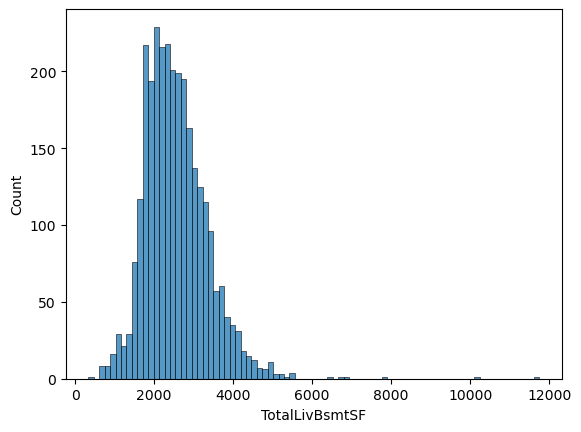

<IPython.core.display.Javascript object>

In [232]:
sns.histplot(x=df["TotalLivBsmtSF"])

# Save

In [233]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,isTest,BsmtSFExt,2ndFlrExt,PoolExt,TotalLivBsmtSF
Id,,,,,,,,,,,,,,,,,,,,,
1,5,3,65.0,8450,1,2,3,3,0,4,...,2,2,8,4,208500.0,0,1,1,0,2566.0
2,0,3,80.0,9600,1,2,3,3,0,2,...,5,1,8,4,181500.0,0,1,0,0,2524.0
3,5,3,68.0,11250,1,2,0,3,0,4,...,9,2,8,4,223500.0,0,1,1,0,2706.0
4,6,3,60.0,9550,1,2,0,3,0,0,...,2,0,8,0,140000.0,0,1,1,0,2473.0
5,5,3,84.0,14260,1,2,0,3,0,2,...,12,2,8,4,250000.0,0,1,1,0,3343.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,13,4,21.0,1936,1,2,3,3,0,4,...,6,0,8,4,NaN,1,1,1,0,1638.0
2916,13,4,21.0,1894,1,2,3,3,0,4,...,4,0,8,0,NaN,1,1,1,0,1638.0
2917,0,3,160.0,20000,1,2,3,3,0,4,...,9,0,8,0,NaN,1,1,0,0,2448.0


<IPython.core.display.Javascript object>

In [234]:
df.to_csv("../../data/house-prices-advanced-regression-techniques/prepared.csv")

<IPython.core.display.Javascript object>